In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import single, average, complete, fcluster, linkage
from itertools import combinations
from collections import defaultdict
from sklearn.cluster import AgglomerativeClustering
import os

In [171]:
skani_file_path_spmp = '/Users/Annaliese/Desktop/PopGenStats_Project/data/B_longum_SPMP/distances/skani.tsv'
parsnp_file_path_spmp = '/Users/Annaliese/Desktop/PopGenStats_Project/data/B_longum_SPMP/distances/parsnp.tsv.gz'

skani_file_path = '/Users/Annaliese/Desktop/PopGenStats_Project/data/B_longum/distances/skani.tsv.gz'
parsnp_file_path = '/Users/Annaliese/Desktop/PopGenStats_Project/data/B_longum/distances/parsnp.tsv'

In [172]:
skani_matrix_spmp = pd.read_csv(skani_file_path_spmp, sep='\t')
parsnp_matrix_spmp = pd.read_csv(parsnp_file_path_spmp, sep='\t')
skani_matrix_spmp['Tool'] = 'skANI'
parsnp_matrix_spmp['Tool'] = 'ParSNP'

skani_matrix = pd.read_csv(skani_file_path, sep='\t')
parsnp_matrix = pd.read_csv(parsnp_file_path, sep='\t')
skani_matrix['Tool'] = 'skANI'
parsnp_matrix['Tool'] = 'ParSNP'

In [173]:
def edit_accession_id(str):
    # match = re.search(r'(GCF_|GCA_)\d{9}\.\d|flye.SQK-NBD\d{3}-\d{2} barcode\d{2}.fasta', str)
    # if match:
    #     return match.group(0)
    
    # if 'SPMP' in str:
    #     return os.path.basename(str)
    
    # return str
    return os.path.basename(str)

In [174]:
# skani_matrix.rename(columns = {'Ref_file': 's1', 'Query_file': 's2', 'ANI':'ANI_1', 'Align_fraction_ref': 'prc_aligned1', 'Align_fraction_query': 'prc_aligned2'}, inplace = True)
skani_matrix_spmp['score1'] = skani_matrix_spmp['ANI'] * (skani_matrix_spmp['Align_fraction_ref'] / 100)
skani_matrix_spmp['score2'] = skani_matrix_spmp['ANI'] * (skani_matrix_spmp['Align_fraction_query'] / 100)

skani_matrix_spmp['Ref_file'] = skani_matrix_spmp['Ref_file'].apply(edit_accession_id)
skani_matrix_spmp['Query_file'] = skani_matrix_spmp['Query_file'].apply(edit_accession_id)

skani_sample_names_spmp = sorted(set(skani_matrix_spmp['Ref_file']) | set(skani_matrix_spmp['Query_file']))
skani_mapper_spmp = {name: f'sample{idx}' for idx, name in enumerate(skani_sample_names_spmp)}

skani_matrix_spmp['ref'] = skani_matrix_spmp['Ref_file'].map(skani_mapper_spmp)
skani_matrix_spmp['query'] = skani_matrix_spmp['Query_file'].map(skani_mapper_spmp)

skani_matrix_spmp

,Ref_file,Query_file,ANI,Align_fraction_ref,Align_fraction_query,Ref_name,Query_name,Tool,score1,score2,ref,query
0,SPMP01_bin.5.fa,GCF_001275745.1_assBLOI2_genomic.fna,98.45,82.35,64.50,opera_contig_66,NZ_LFDU01000001.1 Bifidobacterium longum subsp...,skANI,81.073575,63.500250,sample526,sample94
1,SPMP01_bin.5.fa,GCF_004334215.1_ASM433421v1_genomic.fna,98.22,82.56,67.11,opera_contig_66,NZ_SHRI01000001.1 Bifidobacterium longum subsp...,skANI,81.090432,65.915442,sample526,sample283
2,SPMP01_bin.5.fa,GCF_022132485.1_NA_genomic.fna,98.50,80.25,61.05,opera_contig_66,NZ_JAKNIY010000001.1 Bifidobacterium longum st...,skANI,79.046250,60.134250,sample526,sample472
3,SPMP01_bin.5.fa,GCA_014871875.1_ASM1487187v1_genomic.fna,98.30,80.26,66.88,opera_contig_66,WGSE01000001.1 MAG: Bifidobacterium longum iso...,skANI,78.895580,65.743040,sample526,sample15
4,SPMP01_bin.5.fa,GCF_004332635.1_ASM433263v1_genomic.fna,98.33,83.67,64.29,opera_contig_66,NZ_SHTC01000001.1 Bifidobacterium longum subsp...,skANI,82.272711,63.216357,sample526,sample204
...,...,...,...,...,...,...,...,...,...,...,...,...
222773,flye.SQK-NBD114-96_barcode75.fasta,flye.SQK-NBD114-96_barcode90.fasta,98.97,84.47,82.92,contig_1,contig_1 rotated=True rotated_gene=dnaA,skANI,83.599959,82.065924,sample636,sample651
222774,flye.SQK-NBD114-96_barcode75.fasta,flye.SQK-NBD114-96_barcode87.fasta,99.94,98.99,99.88,contig_1,contig_1 rotated=True rotated_gene=dnaA,skANI,98.930606,99.820072,sample636,sample648
222775,flye.SQK-NBD114-96_barcode75.fasta,flye.SQK-NBD114-96_barcode84.fasta,98.97,84.86,85.41,contig_1,contig_1 rotated=True rotated_gene=dnaA,skANI,83.985942,84.530277,sample636,sample645
222776,flye.SQK-NBD114-96_barcode75.fasta,flye.SQK-NBD114-96_barcode81.fasta,98.98,84.42,80.07,contig_1,contig_1 rotated=True rotated_gene=dnaA,skANI,83.558916,79.253286,sample636,sample642


In [175]:
skani_matrix['score1'] = skani_matrix['ANI'] * (skani_matrix['Align_fraction_ref'] / 100)
skani_matrix['score2'] = skani_matrix['ANI'] * (skani_matrix['Align_fraction_query'] / 100)

skani_matrix['Ref_file'] = skani_matrix['Ref_file'].apply(edit_accession_id)
skani_matrix['Query_file'] = skani_matrix['Query_file'].apply(edit_accession_id)

skani_sample_names = sorted(set(skani_matrix['Ref_file']) | set(skani_matrix['Query_file']))
skani_mapper = {name: f'sample{idx}' for idx, name in enumerate(skani_sample_names)}

skani_matrix['ref'] = skani_matrix['Ref_file'].map(skani_mapper)
skani_matrix['query'] = skani_matrix['Query_file'].map(skani_mapper)

skani_matrix

,Ref_file,Query_file,ANI,Align_fraction_ref,Align_fraction_query,Ref_name,Query_name,Tool,score1,score2,ref,query
0,ext_flye.SQK-NBD114-96_barcode49.fasta,int_GCF_002833175.1_ASM283317v1_genomic.fna,98.73,83.96,78.95,contig_1 rotated=True rotated_gene=dnaA,NZ_PJED01000001.1 Bifidobacterium longum strai...,skANI,82.893708,77.947335,sample0,sample189
1,ext_flye.SQK-NBD114-96_barcode49.fasta,int_GCF_004334855.1_ASM433485v1_genomic.fna,98.43,83.84,78.57,contig_1 rotated=True rotated_gene=dnaA,NZ_SHTT01000001.1 Bifidobacterium longum subsp...,skANI,82.523712,77.336451,sample0,sample378
2,ext_flye.SQK-NBD114-96_barcode49.fasta,int_GCF_026520385.1_ASM2652038v1_genomic.fna,98.74,82.42,79.50,contig_1 rotated=True rotated_gene=dnaA,NZ_WMFR01000010.1 Bifidobacterium longum subsp...,skANI,81.381508,78.498300,sample0,sample567
3,ext_flye.SQK-NBD114-96_barcode49.fasta,int_GCA_958435375.1_SRR18940292_bin.5_MetaWRAP...,98.60,82.91,81.25,contig_1 rotated=True rotated_gene=dnaA,CAUBFY010000001.1 MAG TPA_asm: Bifidobacterium...,skANI,81.749260,80.112500,sample0,sample110
4,ext_flye.SQK-NBD114-96_barcode49.fasta,int_GCF_004333265.1_ASM433326v1_genomic.fna,98.84,84.66,81.85,contig_1 rotated=True rotated_gene=dnaA,NZ_SHRW01000001.1 Bifidobacterium longum subsp...,skANI,83.677944,80.900540,sample0,sample299
...,...,...,...,...,...,...,...,...,...,...,...,...
188186,int_GCF_016759765.1_ASM1675976v1_genomic.fna,int_GCF_020531735.1_ASM2053173v1_genomic.fna,98.74,86.11,84.17,NZ_JAERWG010000001.1 Bifidobacterium longum su...,NZ_JAJBBY010000010.1 Bifidobacterium longum su...,skANI,85.025014,83.109458,sample457,sample536
188187,int_GCF_016759765.1_ASM1675976v1_genomic.fna,int_GCF_017312565.1_ASM1731256v1_genomic.fna,98.90,84.12,85.80,NZ_JAERWG010000001.1 Bifidobacterium longum su...,NZ_BNGZ01000001.1 Bifidobacterium longum subsp...,skANI,83.194680,84.856200,sample457,sample469
188188,int_GCF_016759765.1_ASM1675976v1_genomic.fna,int_GCF_030414115.1_ASM3041411v1_genomic.fna,98.50,84.51,79.61,NZ_JAERWG010000001.1 Bifidobacterium longum su...,NZ_QCZN01000001.1 Bifidobacterium longum subsp...,skANI,83.242350,78.415850,sample457,sample591
188189,int_GCF_016759765.1_ASM1675976v1_genomic.fna,int_GCF_019131725.1_ASM1913172v1_genomic.fna,98.89,87.36,85.83,NZ_JAERWG010000001.1 Bifidobacterium longum su...,NZ_JAHOMU010000010.1 Bifidobacterium longum st...,skANI,86.390304,84.877287,sample457,sample524


SANITY CHECK THAT SAMPLES ARE WITHIN THE SPECIES-LEVEL ANI THRESHOLD

In [176]:
skani_matrix_spmp['ANI'].min(), skani_matrix["ANI"].min()

(np.float64(95.61), np.float64(95.33))

HOW MANY SAMPLES ARE OUR LAB'S ISOLATES?

In [177]:
unique_barcodes = skani_matrix_spmp['Ref_file'].str.contains(r'SQK-NBD114-96_barcode\d{2}', regex=True)
unique_names = skani_matrix_spmp[unique_barcodes]['Ref_file'].unique()
len(unique_names)

46

In [178]:
parsnp_matrix_spmp['ANI_1'] = 100 - parsnp_matrix_spmp['prc']

parsnp_matrix_spmp['p1'] = parsnp_matrix_spmp['p1'].apply(edit_accession_id)
parsnp_matrix_spmp['p2'] = parsnp_matrix_spmp['p2'].apply(edit_accession_id)

parsnp_sample_names_spmp = sorted(set(parsnp_matrix_spmp['p1']) | set(parsnp_matrix_spmp['p2']))
parsnp_mapper_spmp = {name: f'sample{idx}' for idx, name in enumerate(parsnp_sample_names_spmp)}

parsnp_matrix_spmp['ref'] = parsnp_matrix_spmp['p1'].map(parsnp_mapper_spmp)
parsnp_matrix_spmp['query'] = parsnp_matrix_spmp['p2'].map(parsnp_mapper_spmp)

parsnp_matrix_spmp

,p1,p2,diff,prc,Tool,ANI_1,ref,query
0,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCA_958434155.1_SRR22541675_bin.8_MetaWRAP_v1....,534,3.729832,ParSNP,96.270168,sample73,sample56
1,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_017743175.1_ASM1774317v1_genomic.fna,644,4.498149,ParSNP,95.501851,sample73,sample410
2,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003465635.1_ASM346563v1_genomic.fna,440,3.073270,ParSNP,96.926730,sample73,sample170
3,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_015670335.1_ASM1567033v1_genomic.fna,527,3.680939,ParSNP,96.319061,sample73,sample373
4,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003464805.1_ASM346480v1_genomic.fna,1,0.006985,ParSNP,99.993015,sample73,sample165
...,...,...,...,...,...,...,...,...
210920,GCF_003466075.1_ASM346607v1_genomic.fna,SPMP29_bin.81.fa,592,4.134944,ParSNP,95.865056,sample175,sample552
210921,GCF_003466075.1_ASM346607v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,716,5.001048,ParSNP,94.998952,sample175,sample38
210922,GCF_004332645.1_ASM433264v1_genomic.fna,SPMP29_bin.81.fa,541,3.778725,ParSNP,96.221275,sample206,sample552
210923,GCF_004332645.1_ASM433264v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,603,4.211776,ParSNP,95.788224,sample206,sample38


In [179]:
parsnp_matrix['ANI_1'] = 100 - parsnp_matrix['prc']

parsnp_matrix['p1'] = parsnp_matrix['p1'].apply(edit_accession_id)
parsnp_matrix['p2'] = parsnp_matrix['p2'].apply(edit_accession_id)

parsnp_sample_names = sorted(set(parsnp_matrix['p1']) | set(parsnp_matrix['p2']))
parsnp_mapper = {name: f'sample{idx}' for idx, name in enumerate(parsnp_sample_names)}

parsnp_matrix['ref'] = parsnp_matrix['p1'].map(parsnp_mapper)
parsnp_matrix['query'] = parsnp_matrix['p2'].map(parsnp_mapper)

parsnp_matrix

,p1,p2,diff,prc,Tool,ANI_1,ref,query
0,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_004333165.1_ASM433316v1_genomic.fna,2118,4.508973,ParSNP,95.491027,sample0,sample295
1,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_002833125.1_ASM283312v1_genomic.fna,1896,4.036361,ParSNP,95.963639,sample0,sample188
2,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_003094935.1_ASM309493v1_genomic.fna,2113,4.498329,ParSNP,95.501671,sample0,sample202
3,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_004334445.1_ASM433444v1_genomic.fna,1976,4.206672,ParSNP,95.793328,sample0,sample360
4,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_000730045.1_ASM73004v1_genomic.fna,1870,3.981010,ParSNP,96.018990,sample0,sample141
...,...,...,...,...,...,...,...,...
188800,int_GCF_003471355.1_ASM347135v1_genomic.fna,ext_flye.SQK-NBD114-96_barcode75.fasta,2270,4.832563,ParSNP,95.167437,sample251,sample26
188801,int_GCF_003471355.1_ASM347135v1_genomic.fna,int_GCA_959018325.1_SRR20881980_bin.22_MetaWRA...,2294,4.883657,ParSNP,95.116343,sample251,sample115
188802,int_GCF_004332895.1_ASM433289v1_genomic.fna,ext_flye.SQK-NBD114-96_barcode75.fasta,2423,5.158282,ParSNP,94.841718,sample282,sample26
188803,int_GCF_004332895.1_ASM433289v1_genomic.fna,int_GCA_959018325.1_SRR20881980_bin.22_MetaWRA...,2245,4.779341,ParSNP,95.220659,sample282,sample115


NUMBER OF SNPS BOXPLOTS

In [180]:
parsnp_matrix_spmp['alignment_size'] = parsnp_matrix_spmp['diff'] / (parsnp_matrix_spmp['prc']/100)
parsnp_matrix_spmp

,p1,p2,diff,prc,Tool,ANI_1,ref,query,alignment_size
0,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCA_958434155.1_SRR22541675_bin.8_MetaWRAP_v1....,534,3.729832,ParSNP,96.270168,sample73,sample56,14317.0
1,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_017743175.1_ASM1774317v1_genomic.fna,644,4.498149,ParSNP,95.501851,sample73,sample410,14317.0
2,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003465635.1_ASM346563v1_genomic.fna,440,3.073270,ParSNP,96.926730,sample73,sample170,14317.0
3,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_015670335.1_ASM1567033v1_genomic.fna,527,3.680939,ParSNP,96.319061,sample73,sample373,14317.0
4,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003464805.1_ASM346480v1_genomic.fna,1,0.006985,ParSNP,99.993015,sample73,sample165,14317.0
...,...,...,...,...,...,...,...,...,...
210920,GCF_003466075.1_ASM346607v1_genomic.fna,SPMP29_bin.81.fa,592,4.134944,ParSNP,95.865056,sample175,sample552,14317.0
210921,GCF_003466075.1_ASM346607v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,716,5.001048,ParSNP,94.998952,sample175,sample38,14317.0
210922,GCF_004332645.1_ASM433264v1_genomic.fna,SPMP29_bin.81.fa,541,3.778725,ParSNP,96.221275,sample206,sample552,14317.0
210923,GCF_004332645.1_ASM433264v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,603,4.211776,ParSNP,95.788224,sample206,sample38,14317.0


In [181]:
parsnp_matrix['alignment_size'] = parsnp_matrix['diff'] / (parsnp_matrix['prc']/100)
parsnp_matrix

,p1,p2,diff,prc,Tool,ANI_1,ref,query,alignment_size
0,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_004333165.1_ASM433316v1_genomic.fna,2118,4.508973,ParSNP,95.491027,sample0,sample295,46973.0
1,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_002833125.1_ASM283312v1_genomic.fna,1896,4.036361,ParSNP,95.963639,sample0,sample188,46973.0
2,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_003094935.1_ASM309493v1_genomic.fna,2113,4.498329,ParSNP,95.501671,sample0,sample202,46973.0
3,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_004334445.1_ASM433444v1_genomic.fna,1976,4.206672,ParSNP,95.793328,sample0,sample360,46973.0
4,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_000730045.1_ASM73004v1_genomic.fna,1870,3.981010,ParSNP,96.018990,sample0,sample141,46973.0
...,...,...,...,...,...,...,...,...,...
188800,int_GCF_003471355.1_ASM347135v1_genomic.fna,ext_flye.SQK-NBD114-96_barcode75.fasta,2270,4.832563,ParSNP,95.167437,sample251,sample26,46973.0
188801,int_GCF_003471355.1_ASM347135v1_genomic.fna,int_GCA_959018325.1_SRR20881980_bin.22_MetaWRA...,2294,4.883657,ParSNP,95.116343,sample251,sample115,46973.0
188802,int_GCF_004332895.1_ASM433289v1_genomic.fna,ext_flye.SQK-NBD114-96_barcode75.fasta,2423,5.158282,ParSNP,94.841718,sample282,sample26,46973.0
188803,int_GCF_004332895.1_ASM433289v1_genomic.fna,int_GCA_959018325.1_SRR20881980_bin.22_MetaWRA...,2245,4.779341,ParSNP,95.220659,sample282,sample115,46973.0


In [182]:
parsnp_snp_matrix_spmp = parsnp_matrix_spmp[['p1', 'p2', 'diff', 'prc']]
parsnp_snp_matrix_spmp

,p1,p2,diff,prc
0,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCA_958434155.1_SRR22541675_bin.8_MetaWRAP_v1....,534,3.729832
1,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_017743175.1_ASM1774317v1_genomic.fna,644,4.498149
2,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003465635.1_ASM346563v1_genomic.fna,440,3.073270
3,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_015670335.1_ASM1567033v1_genomic.fna,527,3.680939
4,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003464805.1_ASM346480v1_genomic.fna,1,0.006985
...,...,...,...,...
210920,GCF_003466075.1_ASM346607v1_genomic.fna,SPMP29_bin.81.fa,592,4.134944
210921,GCF_003466075.1_ASM346607v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,716,5.001048
210922,GCF_004332645.1_ASM433264v1_genomic.fna,SPMP29_bin.81.fa,541,3.778725
210923,GCF_004332645.1_ASM433264v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,603,4.211776


In [183]:
parsnp_snp_matrix = parsnp_matrix[['p1', 'p2', 'diff', 'prc']]
parsnp_snp_matrix

,p1,p2,diff,prc
0,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_004333165.1_ASM433316v1_genomic.fna,2118,4.508973
1,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_002833125.1_ASM283312v1_genomic.fna,1896,4.036361
2,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_003094935.1_ASM309493v1_genomic.fna,2113,4.498329
3,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_004334445.1_ASM433444v1_genomic.fna,1976,4.206672
4,GCF_003474905.1_ASM347490v1_genomic.fna.ref,int_GCF_000730045.1_ASM73004v1_genomic.fna,1870,3.981010
...,...,...,...,...
188800,int_GCF_003471355.1_ASM347135v1_genomic.fna,ext_flye.SQK-NBD114-96_barcode75.fasta,2270,4.832563
188801,int_GCF_003471355.1_ASM347135v1_genomic.fna,int_GCA_959018325.1_SRR20881980_bin.22_MetaWRA...,2294,4.883657
188802,int_GCF_004332895.1_ASM433289v1_genomic.fna,ext_flye.SQK-NBD114-96_barcode75.fasta,2423,5.158282
188803,int_GCF_004332895.1_ASM433289v1_genomic.fna,int_GCA_959018325.1_SRR20881980_bin.22_MetaWRA...,2245,4.779341


In [184]:
# sns.boxplot(parsnp_snp_matrix_spmp, x='p1', y='diff')

Text(0.5, 1.0, '# of SNPs in all B. longum Samples')

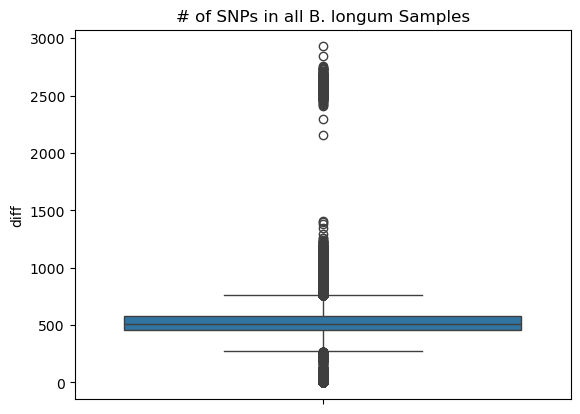

In [185]:
sns.boxplot(parsnp_snp_matrix_spmp, y='diff')
plt.title('# of SNPs in all B. longum Samples')

MAKE CLUSTERING MATRICES FOR EACH TOOL

In [186]:
skani_diagonal_data_spmp = []
for sample in skani_sample_names_spmp:
    skani_diagonal_data_spmp.append({
        'Ref_file': sample,
        'Query_file': sample,
        'ANI': 100,
        'Align_fraction_ref': 100,
        'Align_fraction_query': 100,
        'Ref_name': '',
        'Query_name': '',
        'ref': skani_mapper_spmp[sample],
        'query': skani_mapper_spmp[sample],
        'score1': 100,
        'score2': 100,
        'Tool': 'skANI'
    })

skani_diagonal_df_spmp = pd.DataFrame(skani_diagonal_data_spmp)
skani_matrix_spmp = pd.concat([skani_matrix_spmp, skani_diagonal_df_spmp], ignore_index=True)

skani_matrix_spmp = skani_matrix_spmp.sort_values(by=['Ref_file', 'Query_file']).reset_index(drop=True)

skani_upper_triangle_spmp = skani_matrix_spmp.pivot(index='ref', columns='query', values='ANI').fillna(0)
skani_upper_triangle_spmp = skani_upper_triangle_spmp[sorted(skani_upper_triangle_spmp.columns)]

skani_lower_triangle_spmp = skani_matrix_spmp.pivot(index='query', columns='ref', values='ANI').fillna(0)
skani_lower_triangle_spmp = skani_lower_triangle_spmp[sorted(skani_lower_triangle_spmp.columns)]

new_skani_matrix_spmp = skani_upper_triangle_spmp + skani_lower_triangle_spmp
new_skani_matrix_spmp[:] = np.where(new_skani_matrix_spmp==200, 100, new_skani_matrix_spmp)

new_skani_matrix_spmp

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.00,99.76,98.30,98.84,98.71,98.56,98.72,98.70,98.89,98.86,...,98.65,98.77,98.91,98.56,98.89,98.72,98.64,98.64,98.84,98.84
sample1,99.76,100.00,98.85,98.92,98.93,98.73,98.84,98.87,98.92,98.87,...,98.57,98.76,98.88,98.76,98.98,98.80,98.86,98.88,98.87,98.87
sample10,98.30,98.85,100.00,98.82,98.74,98.70,98.32,98.55,98.35,98.47,...,98.48,98.71,98.65,98.51,98.35,98.40,98.84,98.64,98.63,98.63
sample100,98.84,98.92,98.82,100.00,98.97,99.07,98.94,98.94,98.79,98.87,...,98.78,99.02,99.04,99.02,98.94,98.56,99.02,99.08,99.01,99.02
sample101,98.71,98.93,98.74,98.97,100.00,98.90,98.85,98.97,98.85,98.92,...,98.54,98.99,98.83,98.86,98.90,98.93,99.02,98.77,98.72,98.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,98.72,98.80,98.40,98.56,98.93,98.69,98.64,98.84,98.59,98.79,...,98.58,98.70,98.70,98.66,98.51,100.00,98.66,98.49,98.85,98.80
sample96,98.64,98.86,98.84,99.02,99.02,98.86,98.88,99.01,98.96,99.07,...,98.83,99.14,98.94,98.86,98.83,98.66,100.00,98.86,98.97,99.02
sample97,98.64,98.88,98.64,99.08,98.77,98.97,98.64,98.73,98.62,98.84,...,98.75,98.81,98.86,98.51,98.69,98.49,98.86,100.00,98.90,98.85


In [187]:
skani_diagonal_data = []
for sample in skani_sample_names:
    skani_diagonal_data.append({
        'Ref_file': sample,
        'Query_file': sample,
        'ANI': 100,
        'Align_fraction_ref': 100,
        'Align_fraction_query': 100,
        'Ref_name': '',
        'Query_name': '',
        'ref': skani_mapper[sample],
        'query': skani_mapper[sample],
        'score1': 100,
        'score2': 100,
        'Tool': 'skANI'
    })

skani_diagonal_df = pd.DataFrame(skani_diagonal_data)
skani_matrix = pd.concat([skani_matrix, skani_diagonal_df], ignore_index=True)

skani_matrix = skani_matrix.sort_values(by=['Ref_file', 'Query_file']).reset_index(drop=True)

skani_upper_triangle = skani_matrix.pivot(index='ref', columns='query', values='ANI').fillna(0)
skani_upper_triangle = skani_upper_triangle[sorted(skani_upper_triangle.columns)]

skani_lower_triangle = skani_matrix.pivot(index='query', columns='ref', values='ANI').fillna(0)
skani_lower_triangle = skani_lower_triangle[sorted(skani_lower_triangle.columns)]

new_skani_matrix = skani_upper_triangle + skani_lower_triangle
new_skani_matrix[:] = np.where(new_skani_matrix==200, 100, new_skani_matrix)

new_skani_matrix

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.00,100.00,98.80,98.86,96.75,98.64,98.86,98.80,98.84,98.61,...,98.56,97.13,98.38,98.59,99.01,98.80,98.30,98.49,98.50,98.83
sample1,100.00,100.00,98.80,98.86,96.75,98.64,98.86,98.80,98.84,98.61,...,98.56,97.13,98.38,98.59,99.01,98.80,98.30,98.49,98.50,98.83
sample10,98.80,98.80,100.00,98.49,96.78,98.79,98.67,98.58,98.60,98.55,...,98.30,97.00,98.53,98.60,98.84,98.71,98.68,98.74,98.52,98.63
sample100,98.86,98.86,98.49,100.00,97.15,98.83,98.82,98.97,98.72,98.75,...,98.78,97.25,98.90,98.95,99.15,98.91,98.90,98.96,98.97,98.92
sample101,96.75,96.75,96.78,97.15,100.00,96.74,96.87,96.82,96.74,96.77,...,96.81,99.16,96.48,96.80,96.92,96.94,96.74,96.76,96.64,96.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,98.80,98.80,98.71,98.91,96.94,98.76,98.74,98.53,98.71,98.60,...,98.63,97.21,98.77,98.82,99.26,100.00,98.86,98.33,99.01,98.91
sample96,98.30,98.30,98.68,98.90,96.74,98.71,98.78,98.88,98.76,98.78,...,98.90,96.80,98.69,98.78,98.89,98.86,100.00,98.88,98.90,98.83
sample97,98.49,98.49,98.74,98.96,96.76,98.89,98.91,98.80,98.72,98.68,...,98.74,96.83,98.60,98.83,99.16,98.33,98.88,100.00,99.02,98.83


In [188]:
parsnp_diagonal_data_spmp = []
for sample in parsnp_sample_names_spmp:
    parsnp_diagonal_data_spmp.append({
        'p1': sample,
        'p2': sample,
        'diff': 0,
        'prc': 0,
        'ANI_1': 100,
        'ref': parsnp_mapper_spmp[sample],
        'query': parsnp_mapper_spmp[sample],
        'Tool': 'ParSNP'
    })

parsnp_diagonal_df_spmp = pd.DataFrame(parsnp_diagonal_data_spmp)
parsnp_matrix_spmp = pd.concat([parsnp_matrix_spmp, parsnp_diagonal_df_spmp], ignore_index=True)

parsnp_matrix_spmp = parsnp_matrix_spmp.sort_values(by=['p1', 'p2']).reset_index(drop=True)

parsnp_upper_triangle_spmp = parsnp_matrix_spmp.pivot_table(index='ref', columns='query', values='ANI_1').fillna(0)
parsnp_upper_triangle_spmp = parsnp_upper_triangle_spmp[sorted(parsnp_upper_triangle_spmp.columns)]

parsnp_lower_triangle_spmp = parsnp_matrix_spmp.pivot_table(index='query', columns='ref', values='ANI_1').fillna(0)
parsnp_lower_triangle_spmp = parsnp_lower_triangle_spmp[sorted(parsnp_lower_triangle_spmp.columns)]

# new_parsnp_matrix = parsnp_upper_triangle + parsnp_lower_triangle
# new_parsnp_matrix[:] = np.where(new_parsnp_matrix==200, 100, new_parsnp_matrix)

new_parsnp_matrix_spmp = np.where(parsnp_upper_triangle_spmp != 0, parsnp_upper_triangle_spmp, parsnp_lower_triangle_spmp)
# THIS PREVENTS NON-ZERO VALUES FROM BEING ADDED TOGETHER

new_parsnp_matrix_spmp = pd.DataFrame(new_parsnp_matrix_spmp, 
                                 index=parsnp_upper_triangle_spmp.index, 
                                 columns=parsnp_upper_triangle_spmp.columns)

new_parsnp_matrix_spmp

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.000000,98.868478,96.381924,96.507648,96.500664,96.465740,96.018719,96.123490,97.066425,96.395893,...,96.821960,94.803381,96.430817,95.529790,96.451771,96.207306,96.374939,96.130474,96.731159,96.507648
sample1,98.868478,100.000000,96.437801,96.591465,96.626388,96.577495,96.102535,96.249214,97.143256,96.465740,...,96.919746,94.957044,96.542572,95.655514,96.577495,96.319061,96.430817,96.221275,96.842914,96.591465
sample10,96.381924,96.437801,100.000000,96.549556,96.360969,96.486694,95.865056,96.193337,97.073409,96.319061,...,96.731159,94.384298,96.388908,95.753300,96.367954,96.123490,95.879025,96.235245,96.703220,96.549556
sample100,96.507648,96.591465,96.549556,100.000000,97.925543,96.437801,96.514633,97.632186,97.408675,97.143256,...,97.094363,94.894182,96.724174,96.102535,97.052455,97.282950,95.795208,97.282950,97.108333,100.000000
sample101,96.500664,96.626388,96.360969,97.925543,100.000000,96.388908,96.661312,96.801006,97.569323,96.696235,...,97.366767,95.131662,96.745128,95.983795,97.108333,97.429629,96.179367,96.814975,97.017532,97.925543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,96.207306,96.319061,96.123490,97.282950,97.429629,96.221275,96.298107,96.661312,97.010547,96.353985,...,96.905776,94.600824,96.549556,95.760285,96.821960,100.000000,95.886010,96.298107,96.528602,97.282950
sample96,96.374939,96.430817,95.879025,95.795208,96.179367,96.116505,95.529790,95.578683,96.570511,96.312077,...,96.479709,94.279528,96.179367,95.620591,95.990780,95.886010,100.000000,95.271356,96.465740,95.795208
sample97,96.130474,96.221275,96.235245,97.282950,96.814975,96.109520,95.837117,96.884822,96.828945,96.745128,...,96.863868,94.482084,96.814975,95.369142,96.291122,96.298107,95.271356,100.000000,96.179367,97.282950


In [189]:
parsnp_diagonal_data = []
for sample in parsnp_sample_names:
    parsnp_diagonal_data.append({
        'p1': sample,
        'p2': sample,
        'diff': 0,
        'prc': 0,
        'ANI_1': 100,
        'ref': parsnp_mapper[sample],
        'query': parsnp_mapper[sample],
        'Tool': 'ParSNP'
    })

parsnp_diagonal_df = pd.DataFrame(parsnp_diagonal_data)
parsnp_matrix = pd.concat([parsnp_matrix, parsnp_diagonal_df], ignore_index=True)

parsnp_matrix = parsnp_matrix.sort_values(by=['p1', 'p2']).reset_index(drop=True)

parsnp_upper_triangle = parsnp_matrix.pivot_table(index='ref', columns='query', values='ANI_1').fillna(0)
parsnp_upper_triangle = parsnp_upper_triangle[sorted(parsnp_upper_triangle.columns)]

parsnp_lower_triangle = parsnp_matrix.pivot_table(index='query', columns='ref', values='ANI_1').fillna(0)
parsnp_lower_triangle = parsnp_lower_triangle[sorted(parsnp_lower_triangle.columns)]

# new_parsnp_matrix = parsnp_upper_triangle + parsnp_lower_triangle
# new_parsnp_matrix[:] = np.where(new_parsnp_matrix==200, 100, new_parsnp_matrix)

new_parsnp_matrix = np.where(parsnp_upper_triangle != 0, parsnp_upper_triangle, parsnp_lower_triangle)
# THIS PREVENTS NON-ZERO VALUES FROM BEING ADDED TOGETHER

new_parsnp_matrix = pd.DataFrame(new_parsnp_matrix, 
                                 index=parsnp_upper_triangle.index, 
                                 columns=parsnp_upper_triangle.columns)

new_parsnp_matrix

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ref,,,,,,,,,,,,,,,,,,,,,
sample0,100.000000,94.826815,95.482511,95.237690,96.485215,87.275669,95.442062,95.669853,95.522960,94.460648,...,95.239819,95.557022,87.822792,95.390969,95.929577,95.906159,95.380325,95.970025,96.544824,96.391544
sample1,94.826815,100.000000,95.642177,94.733145,95.386712,86.583782,94.396781,95.092926,94.818300,94.007196,...,94.794882,94.601154,87.135163,94.479808,94.660763,95.263236,94.596896,95.124859,95.376067,94.952419
sample10,95.482511,95.642177,100.000000,95.324974,95.827390,87.032976,95.188725,95.950865,95.486769,94.381879,...,95.329232,95.376067,87.537522,95.367552,95.752879,95.595342,95.099312,95.378196,95.429289,95.365423
sample100,95.237690,94.733145,95.324974,100.000000,95.893386,86.764737,94.973708,95.299427,95.463351,94.220084,...,95.431418,95.476125,87.305473,95.197241,95.718817,95.810359,95.618760,95.650693,95.608115,95.588955
sample101,96.485215,95.386712,95.827390,95.893386,100.000000,87.356567,95.786941,95.844421,96.555468,94.903455,...,95.663466,95.554893,87.861112,95.835906,96.306389,96.561855,95.891257,96.602303,96.593788,96.119047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,95.906159,95.263236,95.595342,95.810359,96.561855,86.969110,95.388840,95.593213,96.451153,95.148277,...,95.997701,95.565538,87.565197,95.923190,95.940221,100.000000,96.159496,96.791774,96.544824,96.112660
sample96,95.380325,94.596896,95.099312,95.618760,95.891257,86.805186,95.227045,95.267494,95.827390,94.492581,...,95.484640,95.254721,87.388500,95.512316,95.429289,96.159496,100.000000,95.891257,95.797586,95.429289
sample97,95.970025,95.124859,95.378196,95.650693,96.602303,87.007430,95.499542,95.403743,96.329806,94.782109,...,95.574053,95.518702,87.558810,95.586826,96.067954,96.791774,95.891257,100.000000,96.348966,96.057310


ENSURE SAMPLES ARE ORDERED THE SAME FOR ALL TOOLS

In [190]:
# sample_name_df = pd.DataFrame({'skani': skani_sample_names,
#                                'parsnp': parsnp_sample_names_spmp})

# sample_name_df

IQTREE CLUSTERS

In [191]:
# criterion = 'maxclust' cares more that the # of clusters stays the same
#             'distance' cares more that the contents of the cluster are similar

# clusters: 5
cluster min value: 94.76147237549766


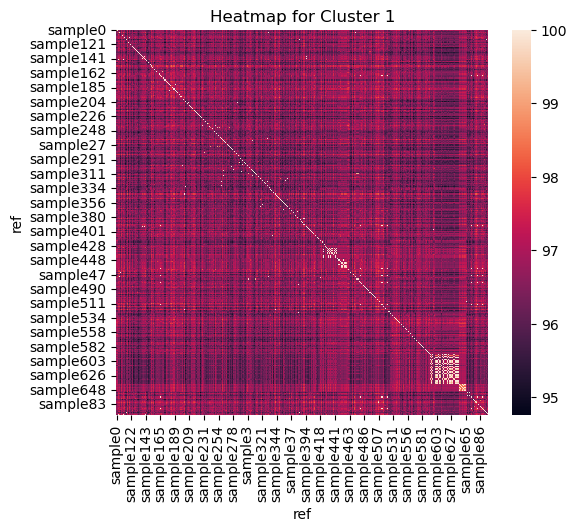

# clusters: 5
cluster min value: 92.53335195920933


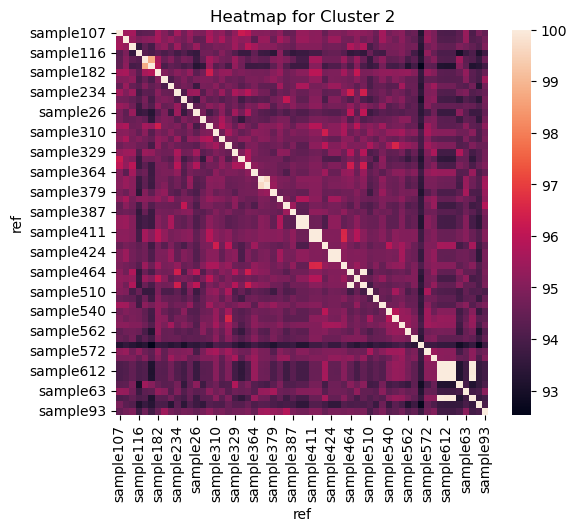

# clusters: 5
cluster min value: 90.61255849689181


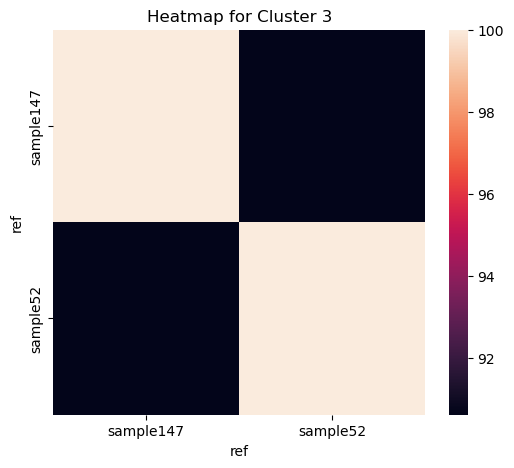

# clusters: 5
cluster min value: 100.0


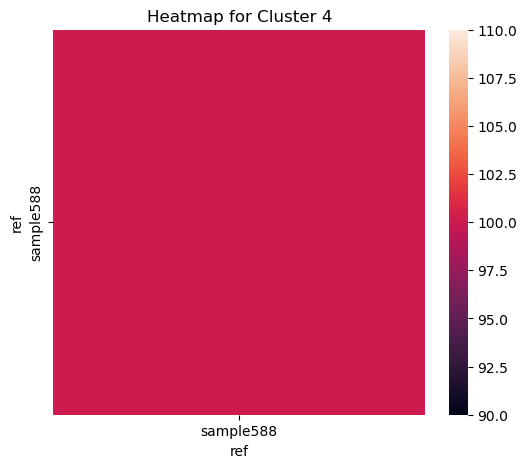

# clusters: 5
cluster min value: 100.0


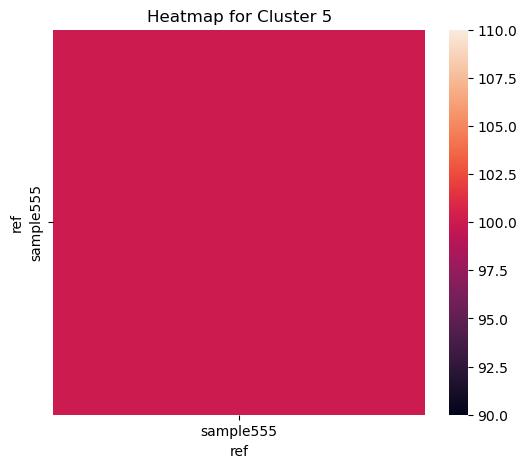

In [192]:
# try with predetermined # clusters instead of distance

new_parsnp_matrix_copy_spmp = new_parsnp_matrix_spmp.copy()
dissimilarity_matrix_spmp = 1 - new_parsnp_matrix_copy_spmp

Z = linkage(dissimilarity_matrix_spmp, method='average') # calculating branch distances, not recalculating pairwise distances?

def cluster_heatmaps(df, Z, max_clust):
    clusters = fcluster(Z, t=max_clust, criterion='maxclust') # use maxclust to preset # of clusters
    
    df['cluster'] = clusters
    
    for cluster_num in range(1, max_clust + 1):
        cluster_samples = df.index[df['cluster'] == cluster_num]
        
        submatrix = df.loc[cluster_samples, cluster_samples]
        
        print(f"# clusters: {len(df['cluster'].unique())}")
        print(f"cluster min value: {submatrix.min().min()}")

        plt.figure(figsize=(6, 5))
        sns.heatmap(submatrix, cbar=True)
        plt.title(f"Heatmap for Cluster {cluster_num}")
        plt.show()

max_dist = 5

cluster_heatmaps(new_parsnp_matrix_copy_spmp, Z, max_dist)

In [193]:
new_parsnp_matrix_copy_spmp = new_parsnp_matrix_spmp.copy()
dissimilarity_matrix_spmp = 100 - new_parsnp_matrix_copy_spmp

new_parsnp_matrix_copy = new_parsnp_matrix.copy()
dissimilarity_matrix = 100 - new_parsnp_matrix_copy

def cluster_heatmaps(df, max_dist):
    clustering = AgglomerativeClustering(
        metric='precomputed', # will not recalculate distances
        linkage='average', # interested to see other linkages
        distance_threshold=max_dist,
        n_clusters=None
    )
    
    clusters = clustering.fit_predict(df) # assigns samples to clusters
    
    df['cluster'] = clusters
    print(df['cluster'])
    
    unique_clusters = df['cluster'].unique()
    print(f"# clusters: {len(unique_clusters)}")

    cluster_divergence_list = []
    
    for cluster_num in unique_clusters:
        cluster_samples = df.index[df['cluster'] == cluster_num]
        submatrix = df.loc[cluster_samples, cluster_samples]
        
        max_divergence = submatrix.max().max()
        print(f"cluster {cluster_num} max divergence: {max_divergence}")
        
        cluster_divergence_list.append({'cluster': cluster_num, 'max_divergence': max_divergence})

        # print(f"cluster min value: {submatrix.min().min()}")

        # plt.figure(figsize=(6, 5))
        # sns.heatmap(submatrix, cbar=True)
        # plt.title(f"Heatmap for Cluster {cluster_num}")
        # plt.show()
    
    divergence_df = pd.DataFrame(cluster_divergence_list)
    
    return df, divergence_df
        
        # plt.figure(figsize=(6, 5))
        # sns.heatmap(submatrix, cbar=True)
        # plt.title(f"Heatmap for Cluster {cluster_num + 1}")
        # plt.show()

max_dist = 3

dissimilarity_matrix_clusters_spmp, max_divergence_df_spmp = cluster_heatmaps(dissimilarity_matrix_spmp, max_dist)

ref
sample0        1
sample1        1
sample10     109
sample100      1
sample101      1
            ... 
sample95      49
sample96      24
sample97      46
sample98       1
sample99       1
Name: cluster, Length: 650, dtype: int64
# clusters: 208
cluster 1 max divergence: 4.086051547111822
cluster 109 max divergence: 0.0
cluster 141 max divergence: 0.0
cluster 162 max divergence: 0.0
cluster 44 max divergence: 2.9265907662219774
cluster 133 max divergence: 0.0
cluster 3 max divergence: 3.1640706851994196
cluster 187 max divergence: 0.0
cluster 110 max divergence: 0.0
cluster 24 max divergence: 3.2269330166934367
cluster 92 max divergence: 2.717049661241873
cluster 107 max divergence: 0.0
cluster 127 max divergence: 0.0
cluster 37 max divergence: 2.863728434727946
cluster 160 max divergence: 0.0
cluster 11 max divergence: 2.9265907662219774
cluster 158 max divergence: 0.0
cluster 22 max divergence: 3.0942236502060467
cluster 170 max divergence: 0.0
cluster 47 max divergence: 2.80086610

In [194]:
dissimilarity_matrix_clusters, max_divergence_df = cluster_heatmaps(dissimilarity_matrix, max_dist)

ref
sample0       71
sample1       51
sample10      21
sample100    215
sample101     19
            ... 
sample95      89
sample96     141
sample97     262
sample98       4
sample99      83
Name: cluster, Length: 615, dtype: int64
# clusters: 382
cluster 71 max divergence: 0.0
cluster 51 max divergence: 0.4981585165946427
cluster 21 max divergence: 2.4035083984416588
cluster 215 max divergence: 0.0
cluster 19 max divergence: 2.754774019117363
cluster 17 max divergence: 2.5567879420092368
cluster 253 max divergence: 0.0
cluster 221 max divergence: 0.0
cluster 279 max divergence: 0.0
cluster 287 max divergence: 0.0
cluster 295 max divergence: 0.0
cluster 246 max divergence: 0.0
cluster 323 max divergence: 0.0
cluster 347 max divergence: 0.0
cluster 229 max divergence: 0.0
cluster 374 max divergence: 0.0
cluster 232 max divergence: 0.0
cluster 349 max divergence: 0.0
cluster 343 max divergence: 0.0
cluster 271 max divergence: 0.0
cluster 263 max divergence: 0.0
cluster 3 max divergence: 

In [195]:
dissimilarity_matrix_clusters_spmp

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99,cluster
ref,,,,,,,,,,,,,,,,,,,,,
sample0,0.000000,1.131522,3.618076,3.492352,3.499336,3.534260,3.981281,3.876510,2.933575,3.604107,...,5.196619,3.569183,4.470210,3.548229,3.792694,3.625061,3.869526,3.268841,3.492352,1
sample1,1.131522,0.000000,3.562199,3.408535,3.373612,3.422505,3.897465,3.750786,2.856744,3.534260,...,5.042956,3.457428,4.344486,3.422505,3.680939,3.569183,3.778725,3.157086,3.408535,1
sample10,3.618076,3.562199,0.000000,3.450444,3.639031,3.513306,4.134944,3.806663,2.926591,3.680939,...,5.615702,3.611092,4.246700,3.632046,3.876510,4.120975,3.764755,3.296780,3.450444,109
sample100,3.492352,3.408535,3.450444,0.000000,2.074457,3.562199,3.485367,2.367814,2.591325,2.856744,...,5.105818,3.275826,3.897465,2.947545,2.717050,4.204792,2.717050,2.891667,0.000000,1
sample101,3.499336,3.373612,3.639031,2.074457,0.000000,3.611092,3.338688,3.198994,2.430677,3.303765,...,4.868338,3.254872,4.016205,2.891667,2.570371,3.820633,3.185025,2.982468,2.074457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,3.792694,3.680939,3.876510,2.717050,2.570371,3.778725,3.701893,3.338688,2.989453,3.646015,...,5.399176,3.450444,4.239715,3.178040,0.000000,4.113990,3.701893,3.471398,2.717050,49
sample96,3.625061,3.569183,4.120975,4.204792,3.820633,3.883495,4.470210,4.421317,3.429489,3.687923,...,5.720472,3.820633,4.379409,4.009220,4.113990,0.000000,4.728644,3.534260,4.204792,24
sample97,3.869526,3.778725,3.764755,2.717050,3.185025,3.890480,4.162883,3.115178,3.171055,3.254872,...,5.517916,3.185025,4.630858,3.708878,3.701893,4.728644,0.000000,3.820633,2.717050,46


In [196]:
dissimilarity_matrix_clusters

query,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99,cluster
ref,,,,,,,,,,,,,,,,,,,,,
sample0,0.000000,5.173185,4.517489,4.762310,3.514785,12.724331,4.557938,4.330147,4.477040,5.539352,...,4.442978,12.177208,4.609031,4.070423,4.093841,4.619675,4.029975,3.455176,3.608456,71
sample1,5.173185,0.000000,4.357823,5.266855,4.613288,13.416218,5.603219,4.907074,5.181700,5.992804,...,5.398846,12.864837,5.520192,5.339237,4.736764,5.403104,4.875141,4.623933,5.047581,51
sample10,4.517489,4.357823,0.000000,4.675026,4.172610,12.967024,4.811275,4.049135,4.513231,5.618121,...,4.623933,12.462478,4.632448,4.247121,4.404658,4.900688,4.621804,4.570711,4.634577,21
sample100,4.762310,5.266855,4.675026,0.000000,4.106614,13.235263,5.026292,4.700573,4.536649,5.779916,...,4.523875,12.694527,4.802759,4.281183,4.189641,4.381240,4.349307,4.391885,4.411045,215
sample101,3.514785,4.613288,4.172610,4.106614,0.000000,12.643433,4.213059,4.155579,3.444532,5.096545,...,4.445107,12.138888,4.164094,3.693611,3.438145,4.108743,3.397697,3.406212,3.880953,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,4.093841,4.736764,4.404658,4.189641,3.438145,13.030890,4.611160,4.406787,3.548847,4.851723,...,4.434462,12.434803,4.076810,4.059779,0.000000,3.840504,3.208226,3.455176,3.887340,89
sample96,4.619675,5.403104,4.900688,4.381240,4.108743,13.194814,4.772955,4.732506,4.172610,5.507419,...,4.745279,12.611500,4.487684,4.570711,3.840504,0.000000,4.108743,4.202414,4.570711,141
sample97,4.029975,4.875141,4.621804,4.349307,3.397697,12.992570,4.500458,4.596257,3.670194,5.217891,...,4.481298,12.441190,4.413174,3.932046,3.208226,4.108743,0.000000,3.651034,3.942690,262


In [197]:
max_divergence_df_spmp

,cluster,max_divergence
0,1,4.086052
1,109,0.000000
2,141,0.000000
3,162,0.000000
4,44,2.926591
...,...,...
203,201,0.000000
204,34,0.000000
205,65,0.000000
206,27,0.000000


In [198]:
max_divergence_df

,cluster,max_divergence
0,71,0.000000
1,51,0.498159
2,21,2.403508
3,215,0.000000
4,19,2.754774
...,...,...
377,106,0.000000
378,89,0.000000
379,141,0.000000
380,262,0.000000


In [199]:
max_divergence_df_spmp.query('max_divergence == 0')

# 141 singleton clusters

,cluster,max_divergence
1,109,0.0
2,141,0.0
3,162,0.0
5,133,0.0
7,187,0.0
...,...,...
203,201,0.0
204,34,0.0
205,65,0.0
206,27,0.0


In [200]:
max_divergence_df.query('max_divergence == 0')

# 300 singleton clusters

,cluster,max_divergence
0,71,0.0
3,215,0.0
6,253,0.0
7,221,0.0
8,279,0.0
...,...,...
377,106,0.0
378,89,0.0
379,141,0.0
380,262,0.0


In [201]:
to_merge_spmp = dissimilarity_matrix_spmp['cluster'].reset_index()
to_merge_spmp

,ref,cluster
0,sample0,1
1,sample1,1
2,sample10,109
3,sample100,1
4,sample101,1
...,...,...
645,sample95,49
646,sample96,24
647,sample97,46
648,sample98,1


In [202]:
to_merge_spmp['cluster'].unique()

array([  1, 109, 141, 162,  44, 133,   3, 187, 110,  24,  92, 107, 127,
        37, 160,  11, 158,  22, 170,  47, 165,  49, 204,  48, 159,  10,
         6,   2,  40, 118, 143, 114,  85,  36,   0,   8,  86,  42,  12,
        91,  43,  26,  13,  46,  35,  39,  15,  41, 123,  80, 119,   7,
       120, 113,  75,  21,  38, 183,  20, 199, 163,  45,  19, 151, 142,
       161, 125,  25, 100, 145, 116, 105, 137, 129, 194, 197,  79, 155,
        87,  50, 156,   5, 112,  31,  70, 207, 173, 146, 111,  95, 121,
       171, 178, 174,  16, 149, 102, 175, 166, 179, 115,  32,  53,  54,
        74, 182, 147, 200,  84, 134, 193, 131, 124,  18, 185, 148, 196,
       184, 130, 117, 203, 167,  28,  76,  29, 186,  14, 180, 139, 205,
       122, 191,  61, 140, 181, 144,  71, 157,  99,   4, 150, 108,  97,
       172,  88, 106, 202,  78,  72,  96, 189,   9,  73,  69, 126, 198,
       164,  90, 169, 101, 136, 104,  17, 177,  82,  98, 168, 135, 153,
        83, 206, 138,  81,  66,  93,  62, 192, 132, 188, 195, 17

In [203]:
to_merge = dissimilarity_matrix['cluster'].reset_index()
to_merge

,ref,cluster
0,sample0,71
1,sample1,51
2,sample10,21
3,sample100,215
4,sample101,19
...,...,...
610,sample95,89
611,sample96,141
612,sample97,262
613,sample98,4


In [204]:
merged_parsnp_spmp = pd.merge(parsnp_matrix_spmp, to_merge_spmp, on='ref', how='left')
iqtree_parsnp_spmp = merged_parsnp_spmp[['p1', 'cluster']].drop_duplicates().reset_index().drop('index', axis=1)

unique_clusters_spmp = iqtree_parsnp_spmp['cluster'].unique()
palette_spmp = sns.color_palette(None, len(unique_clusters_spmp))

cluster_color_map_spmp = {cluster: f'rgba({color[0]*255:.2f},{color[1]*255:.2f},{color[2]*255:.2f},1.0)' 
                     for cluster, color in zip(unique_clusters_spmp, palette_spmp)}

iqtree_parsnp_spmp['colour'] = iqtree_parsnp_spmp['cluster'].map(cluster_color_map_spmp)
iqtree_parsnp_spmp

,p1,cluster,colour
0,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)"
1,GCA_008668865.1_ASM866886v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)"
2,GCA_008669195.1_ASM866919v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)"
3,GCA_008670925.1_ASM867092v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)"
4,GCA_008671675.1_ASM867167v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)"
...,...,...,...
645,flye.barcode14.fasta,1,"rgba(31.00,119.00,180.00,1.0)"
646,flye.barcode38.fasta,1,"rgba(31.00,119.00,180.00,1.0)"
647,flye.barcode40.fasta,1,"rgba(31.00,119.00,180.00,1.0)"
648,flye.barcode41.fasta,1,"rgba(31.00,119.00,180.00,1.0)"


In [205]:
merged_parsnp = pd.merge(parsnp_matrix, to_merge, on='ref', how='left')
iqtree_parsnp = merged_parsnp[['p1', 'cluster']].drop_duplicates().reset_index().drop('index', axis=1)

unique_clusters = iqtree_parsnp['cluster'].unique()
palette = sns.color_palette(None, len(unique_clusters))

cluster_color_map = {cluster: f'rgba({color[0]*255:.2f},{color[1]*255:.2f},{color[2]*255:.2f},1.0)' 
                     for cluster, color in zip(unique_clusters, palette)}

iqtree_parsnp['colour'] = iqtree_parsnp['cluster'].map(cluster_color_map)
iqtree_parsnp

,p1,cluster,colour
0,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)"
1,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)"
2,ext_flye.SQK-NBD114-96_barcode50.fasta,51,"rgba(255.00,127.00,14.00,1.0)"
3,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)"
4,ext_flye.SQK-NBD114-96_barcode52.fasta,21,"rgba(44.00,160.00,44.00,1.0)"
...,...,...,...
610,int_GCF_902505545.1_LH277_genomic.fna,52,"rgba(23.00,190.00,207.00,1.0)"
611,int_GCF_925297675.1_IM810_genomic.fna,76,"rgba(140.00,86.00,75.00,1.0)"
612,int_GCF_925300395.1_IM937_genomic.fna,17,"rgba(127.00,127.00,127.00,1.0)"
613,int_GCF_934630425.1_ERR7738246_bin.25_genomic.fna,220,"rgba(31.00,119.00,180.00,1.0)"


In [206]:
with open('/Users/Annaliese/Desktop/PopGenStats_Project/data/B_longum_SPMP/tree/iqtree.parsnp.renamed.treefile.annot.ahc_dist.txt', 'w') as f:
    f.write("\n")
    f.write("        DATASET_COLORSTRIP\n\n")
    f.write("        SEPARATOR SPACE\n")
    f.write("        DATASET_LABEL ahc_dist\n")
    f.write("        COLOR #ff0000\n\n")
    f.write("        COLOR_BRANCHES 0\n\n")
    f.write("        DATA\n\n")
    
    for _, row in iqtree_parsnp_spmp.iterrows():
        genome_id = row['p1']
        colour = row['colour']
        cluster = row['cluster']
        f.write(f"{genome_id} {colour} {cluster}\n")

In [207]:
parsnp_snp_matrix_spmp

,p1,p2,diff,prc
0,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCA_958434155.1_SRR22541675_bin.8_MetaWRAP_v1....,534,3.729832
1,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_017743175.1_ASM1774317v1_genomic.fna,644,4.498149
2,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003465635.1_ASM346563v1_genomic.fna,440,3.073270
3,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_015670335.1_ASM1567033v1_genomic.fna,527,3.680939
4,GCF_000196555.1_ASM19655v1_genomic.fna.ref,GCF_003464805.1_ASM346480v1_genomic.fna,1,0.006985
...,...,...,...,...
210920,GCF_003466075.1_ASM346607v1_genomic.fna,SPMP29_bin.81.fa,592,4.134944
210921,GCF_003466075.1_ASM346607v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,716,5.001048
210922,GCF_004332645.1_ASM433264v1_genomic.fna,SPMP29_bin.81.fa,541,3.778725
210923,GCF_004332645.1_ASM433264v1_genomic.fna,GCA_025757825.1_ASM2575782v1_genomic.fna,603,4.211776


In [208]:
m_spmp = iqtree_parsnp_spmp.merge(parsnp_snp_matrix_spmp)
m_spmp

,p1,cluster,colour,p2,diff,prc
0,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_018408965.1_ASM1840896v1_genomic.fna,589,4.113990
1,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_019128185.1_ASM1912818v1_genomic.fna,453,3.164071
2,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_022132485.1_NA_genomic.fna,382,2.668157
3,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_003094995.1_ASM309499v1_genomic.fna,459,3.205979
4,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_030291325.1_ASM3029132v1_genomic.fna,474,3.310749
...,...,...,...,...,...,...
210920,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",GCF_003437135.1_ASM343713v1_genomic.fna,343,2.395753
210921,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",GCF_003466075.1_ASM346607v1_genomic.fna,511,3.569183
210922,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",GCF_004332645.1_ASM433264v1_genomic.fna,451,3.150101
210923,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",SPMP29_bin.81.fa,442,3.087239


In [209]:
m = iqtree_parsnp.merge(parsnp_snp_matrix)
m

,p1,cluster,colour,p2,diff,prc
0,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_004333165.1_ASM433316v1_genomic.fna,2118,4.508973
1,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_002833125.1_ASM283312v1_genomic.fna,1896,4.036361
2,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_003094935.1_ASM309493v1_genomic.fna,2113,4.498329
3,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_004334445.1_ASM433444v1_genomic.fna,1976,4.206672
4,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_000730045.1_ASM73004v1_genomic.fna,1870,3.981010
...,...,...,...,...,...,...
188800,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",int_GCF_003464805.1_ASM346480v1_genomic.fna,2078,4.423818
188801,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",int_GCF_003471355.1_ASM347135v1_genomic.fna,2060,4.385498
188802,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",int_GCF_004332895.1_ASM433289v1_genomic.fna,2128,4.530262
188803,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode75.fasta,2073,4.413174


In [253]:
cluster_stats_spmp = m_spmp.groupby('cluster_spmp')['diff_spmp'].agg(['mean', 'median'])
cluster_stats_spmp

,mean,median
cluster_spmp,,
0,535.575510,528.0
1,465.194238,458.0
2,507.082913,496.0
3,510.825877,503.0
4,515.248276,509.0
...,...,...
203,548.656566,540.0
204,536.197080,525.0
205,646.344704,632.0


Text(0, 0.5, 'SNP count')

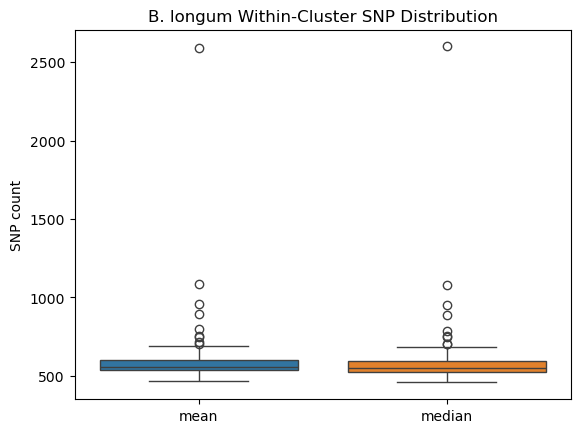

In [256]:
sns.boxplot(cluster_stats_spmp)
plt.title('B. longum Within-Cluster SNP Distribution')
plt.ylabel('SNP count')

GET # SNPS FOR GREEN AND YELLOW CLADES

In [213]:
m_spmp.rename(columns={'cluster': 'cluster_spmp', 'diff': 'diff_spmp', 'prc': 'prc_spmp'}, inplace=True)
m_spmp['data'] = 'SPMP'
m_spmp

,p1,cluster_spmp,colour,p2,diff_spmp,prc_spmp,data
0,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_018408965.1_ASM1840896v1_genomic.fna,589,4.113990,SPMP
1,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_019128185.1_ASM1912818v1_genomic.fna,453,3.164071,SPMP
2,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_022132485.1_NA_genomic.fna,382,2.668157,SPMP
3,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_003094995.1_ASM309499v1_genomic.fna,459,3.205979,SPMP
4,GCA_008668555.1_ASM866855v1_genomic.fna,1,"rgba(31.00,119.00,180.00,1.0)",GCF_030291325.1_ASM3029132v1_genomic.fna,474,3.310749,SPMP
...,...,...,...,...,...,...,...
210920,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",GCF_003437135.1_ASM343713v1_genomic.fna,343,2.395753,SPMP
210921,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",GCF_003466075.1_ASM346607v1_genomic.fna,511,3.569183,SPMP
210922,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",GCF_004332645.1_ASM433264v1_genomic.fna,451,3.150101,SPMP
210923,flye.barcode47.fasta,1,"rgba(31.00,119.00,180.00,1.0)",SPMP29_bin.81.fa,442,3.087239,SPMP


In [214]:
m_yellow_spmp = m_spmp.query('cluster_spmp == 154')
m_yellow_spmp

,p1,cluster_spmp,colour,p2,diff_spmp,prc_spmp,data
195317,flye.SQK-NBD114-96_barcode51.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCA_008679415.1_ASM867941v1_genomic.fna,546,3.813648,SPMP
195318,flye.SQK-NBD114-96_barcode51.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCF_024349265.1_ASM2434926v1_genomic.fna,528,3.687923,SPMP
195319,flye.SQK-NBD114-96_barcode51.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCA_021617965.1_ASM2161796v1_genomic.fna,478,3.338688,SPMP
195320,flye.SQK-NBD114-96_barcode51.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCF_000007525.1_ASM752v1_genomic.fna,521,3.639031,SPMP
195321,flye.SQK-NBD114-96_barcode51.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCF_003437135.1_ASM343713v1_genomic.fna,451,3.150101,SPMP
...,...,...,...,...,...,...,...
207154,flye.SQK-NBD114-96_barcode96.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCF_003437135.1_ASM343713v1_genomic.fna,471,3.289795,SPMP
207155,flye.SQK-NBD114-96_barcode96.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCF_003466075.1_ASM346607v1_genomic.fna,624,4.358455,SPMP
207156,flye.SQK-NBD114-96_barcode96.fasta,154,"rgba(127.00,127.00,127.00,1.0)",GCF_004332645.1_ASM433264v1_genomic.fna,561,3.918419,SPMP
207157,flye.SQK-NBD114-96_barcode96.fasta,154,"rgba(127.00,127.00,127.00,1.0)",SPMP29_bin.81.fa,483,3.373612,SPMP


In [215]:
m['data'] = 'old_data'
m

,p1,cluster,colour,p2,diff,prc,data
0,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_004333165.1_ASM433316v1_genomic.fna,2118,4.508973,old_data
1,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_002833125.1_ASM283312v1_genomic.fna,1896,4.036361,old_data
2,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_003094935.1_ASM309493v1_genomic.fna,2113,4.498329,old_data
3,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_004334445.1_ASM433444v1_genomic.fna,1976,4.206672,old_data
4,GCF_003474905.1_ASM347490v1_genomic.fna.ref,71,"rgba(31.00,119.00,180.00,1.0)",int_GCF_000730045.1_ASM73004v1_genomic.fna,1870,3.981010,old_data
...,...,...,...,...,...,...,...
188800,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",int_GCF_003464805.1_ASM346480v1_genomic.fna,2078,4.423818,old_data
188801,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",int_GCF_003471355.1_ASM347135v1_genomic.fna,2060,4.385498,old_data
188802,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",int_GCF_004332895.1_ASM433289v1_genomic.fna,2128,4.530262,old_data
188803,int_GCF_934675445.1_ERR7738272_bin.69_genomic.fna,126,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode75.fasta,2073,4.413174,old_data


In [216]:
filtered_m = m.loc[m['p1'].str.contains('SQK', case=False, na=False)]
filtered_m

,p1,cluster,colour,p2,diff,prc,data
614,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_019131725.1_ASM1913172v1_genomic.fna,2568,5.466970,old_data
615,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_014898115.1_ASM1489811v1_genomic.fna,2205,4.694186,old_data
616,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_021184065.1_ASM2118406v1_genomic.fna,2169,4.617546,old_data
617,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCA_022713085.1_ASM2271308v1_genomic.fna,2426,5.164669,old_data
618,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_028894815.1_ASM2889481v1_genomic.fna,2392,5.092287,old_data
...,...,...,...,...,...,...,...
14589,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_003464805.1_ASM346480v1_genomic.fna,1978,4.210930,old_data
14590,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_003471355.1_ASM347135v1_genomic.fna,1854,3.946948,old_data
14591,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_004332895.1_ASM433289v1_genomic.fna,2127,4.528133,old_data
14592,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode75.fasta,2045,4.353565,old_data


In [217]:
m_yellow = m.query('cluster == 21')
m_yellow

,p1,cluster,colour,p2,diff,prc,data
914,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_005406285.1_ASM540628v1_genomic.fna,2181,4.643093,old_data
915,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_022014335.1_ASM2201433v1_genomic.fna,1960,4.172610,old_data
916,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_004333035.1_ASM433303v1_genomic.fna,2102,4.474911,old_data
917,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_019131855.1_ASM1913185v1_genomic.fna,2316,4.930492,old_data
918,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCA_019419305.1_ASM1941930v1_genomic.fna,2092,4.453622,old_data
...,...,...,...,...,...,...,...
14589,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_003464805.1_ASM346480v1_genomic.fna,1978,4.210930,old_data
14590,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_003471355.1_ASM347135v1_genomic.fna,1854,3.946948,old_data
14591,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",int_GCF_004332895.1_ASM433289v1_genomic.fna,2127,4.528133,old_data
14592,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode75.fasta,2045,4.353565,old_data


In [218]:
len(m_yellow_spmp['p1'].unique()), len(m_yellow['p1'].unique())

(31, 31)

In [219]:
# sns.boxplot(m_yellow_spmp, x='cluster', y='diff')
# # plt.ylim(475, 700)
# plt.title("SPMP - SNP distribution for B. longum Yellow Clade")

In [220]:
m_yellow_merged = pd.concat([m_yellow, m_yellow_spmp])
m_yellow_merged[['p1', 'diff', 'prc', 'cluster', 'diff_spmp', 'prc_spmp', 'cluster_spmp', 'data']]

,p1,diff,prc,cluster,diff_spmp,prc_spmp,cluster_spmp,data
914,ext_flye.SQK-NBD114-96_barcode51.fasta,2181.0,4.643093,21.0,NaN,NaN,NaN,old_data
915,ext_flye.SQK-NBD114-96_barcode51.fasta,1960.0,4.172610,21.0,NaN,NaN,NaN,old_data
916,ext_flye.SQK-NBD114-96_barcode51.fasta,2102.0,4.474911,21.0,NaN,NaN,NaN,old_data
917,ext_flye.SQK-NBD114-96_barcode51.fasta,2316.0,4.930492,21.0,NaN,NaN,NaN,old_data
918,ext_flye.SQK-NBD114-96_barcode51.fasta,2092.0,4.453622,21.0,NaN,NaN,NaN,old_data
...,...,...,...,...,...,...,...,...
207154,flye.SQK-NBD114-96_barcode96.fasta,NaN,NaN,NaN,471.0,3.289795,154.0,SPMP
207155,flye.SQK-NBD114-96_barcode96.fasta,NaN,NaN,NaN,624.0,4.358455,154.0,SPMP
207156,flye.SQK-NBD114-96_barcode96.fasta,NaN,NaN,NaN,561.0,3.918419,154.0,SPMP
207157,flye.SQK-NBD114-96_barcode96.fasta,NaN,NaN,NaN,483.0,3.373612,154.0,SPMP


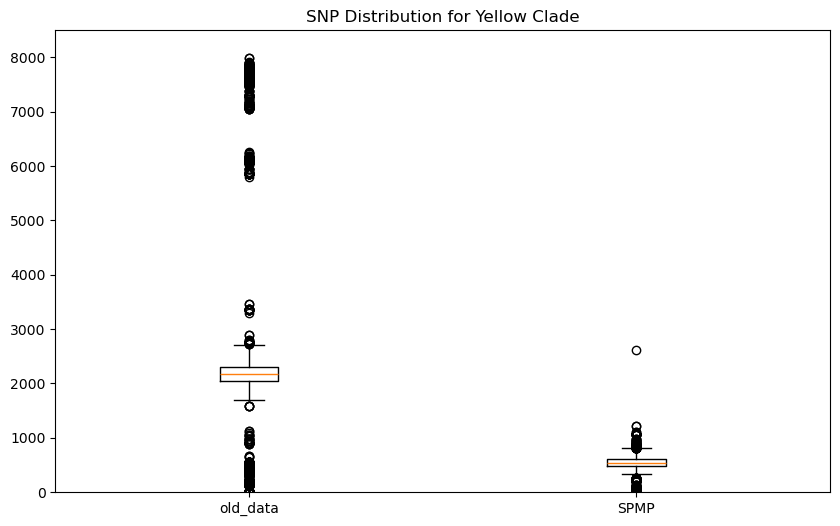

In [221]:
m_diff_y = m_yellow_merged[m_yellow_merged['data'] == 'old_data']['diff'].dropna()
m_spmp_diff_y = m_yellow_merged[m_yellow_merged['data'] == 'SPMP']['diff_spmp'].dropna()

plot_data_y = [m_diff_y, m_spmp_diff_y]

plt.figure(figsize=(10, 6))
plt.boxplot(plot_data_y, labels=['old_data', 'SPMP'])
plt.title("SNP Distribution for Yellow Clade")
plt.ylim(0, 8500)
plt.show()

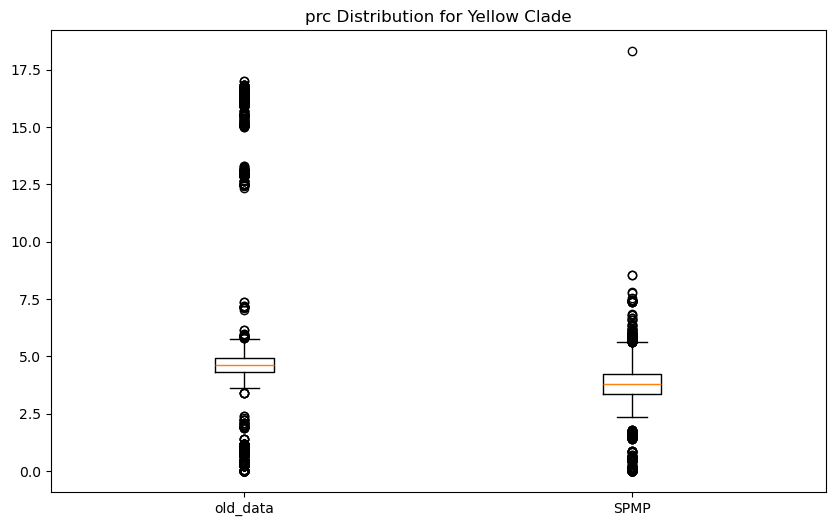

In [222]:
m_prc_y = m_yellow_merged[m_yellow_merged['data'] == 'old_data']['prc'].dropna()
m_spmp_prc_y = m_yellow_merged[m_yellow_merged['data'] == 'SPMP']['prc_spmp'].dropna()

plot_data_y = [m_prc_y, m_spmp_prc_y]

plt.figure(figsize=(10, 6))
plt.boxplot(plot_data_y, labels=['old_data', 'SPMP'])
plt.title("prc Distribution for Yellow Clade")
plt.show()

In [223]:
# sns.boxplot(m_yellow_merged, x='data', y='')

In [224]:
# sns.displot(m_yellow, x='diff', y='ANI')
# plt.title("SPMP - B. longum Yellow Clade Number of SNPs vs ANI")

In [225]:
m_green_spmp = m_spmp.query('cluster_spmp == 51')

m_green_spmp

,p1,cluster_spmp,colour,p2,diff_spmp,prc_spmp,data
194703,flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCF_019131585.1_ASM1913158v1_genomic.fna,510,3.562199,SPMP
194704,flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCF_002833265.1_ASM283326v1_genomic.fna,622,4.344486,SPMP
194705,flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCA_008673975.1_ASM867397v1_genomic.fna,523,3.653000,SPMP
194706,flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCF_004332965.1_ASM433296v1_genomic.fna,520,3.632046,SPMP
194707,flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCA_031293925.1_ASM3129392v1_genomic.fna,558,3.897465,SPMP
...,...,...,...,...,...,...,...
205869,flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCF_003437135.1_ASM343713v1_genomic.fna,378,2.640218,SPMP
205870,flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCF_003466075.1_ASM346607v1_genomic.fna,591,4.127960,SPMP
205871,flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(227.00,119.00,194.00,1.0)",GCF_004332645.1_ASM433264v1_genomic.fna,514,3.590138,SPMP
205872,flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(227.00,119.00,194.00,1.0)",SPMP29_bin.81.fa,504,3.520291,SPMP


In [226]:
m_green = m.query('cluster == 51')
m_green

,p1,cluster,colour,p2,diff,prc,data
614,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_019131725.1_ASM1913172v1_genomic.fna,2568,5.466970,old_data
615,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_014898115.1_ASM1489811v1_genomic.fna,2205,4.694186,old_data
616,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_021184065.1_ASM2118406v1_genomic.fna,2169,4.617546,old_data
617,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCA_022713085.1_ASM2271308v1_genomic.fna,2426,5.164669,old_data
618,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_028894815.1_ASM2889481v1_genomic.fna,2392,5.092287,old_data
...,...,...,...,...,...,...,...
12860,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_003464805.1_ASM346480v1_genomic.fna,2177,4.634577,old_data
12861,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_003471355.1_ASM347135v1_genomic.fna,2249,4.787857,old_data
12862,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",int_GCF_004332895.1_ASM433289v1_genomic.fna,2410,5.130607,old_data
12863,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode75.fasta,83,0.176697,old_data


In [227]:
len(m_green_spmp['p1'].unique()), len(m_green['p1'].unique())

(16, 16)

In [228]:
# sns.boxplot(m_green_spmp, x='cluster', y='diff')
# # plt.ylim(475, 700)
# plt.title("SPMP - SNP distribution for B. longum Green Clade")

In [229]:
m_green_merged = pd.concat([m_green, m_green_spmp])
m_green_merged[['p1', 'diff', 'prc', 'cluster', 'diff_spmp', 'prc_spmp', 'cluster_spmp', 'data']]

,p1,diff,prc,cluster,diff_spmp,prc_spmp,cluster_spmp,data
614,ext_flye.SQK-NBD114-96_barcode49.fasta,2568.0,5.466970,51.0,NaN,NaN,NaN,old_data
615,ext_flye.SQK-NBD114-96_barcode49.fasta,2205.0,4.694186,51.0,NaN,NaN,NaN,old_data
616,ext_flye.SQK-NBD114-96_barcode49.fasta,2169.0,4.617546,51.0,NaN,NaN,NaN,old_data
617,ext_flye.SQK-NBD114-96_barcode49.fasta,2426.0,5.164669,51.0,NaN,NaN,NaN,old_data
618,ext_flye.SQK-NBD114-96_barcode49.fasta,2392.0,5.092287,51.0,NaN,NaN,NaN,old_data
...,...,...,...,...,...,...,...,...
205869,flye.SQK-NBD114-96_barcode89.fasta,NaN,NaN,NaN,378.0,2.640218,51.0,SPMP
205870,flye.SQK-NBD114-96_barcode89.fasta,NaN,NaN,NaN,591.0,4.127960,51.0,SPMP
205871,flye.SQK-NBD114-96_barcode89.fasta,NaN,NaN,NaN,514.0,3.590138,51.0,SPMP
205872,flye.SQK-NBD114-96_barcode89.fasta,NaN,NaN,NaN,504.0,3.520291,51.0,SPMP


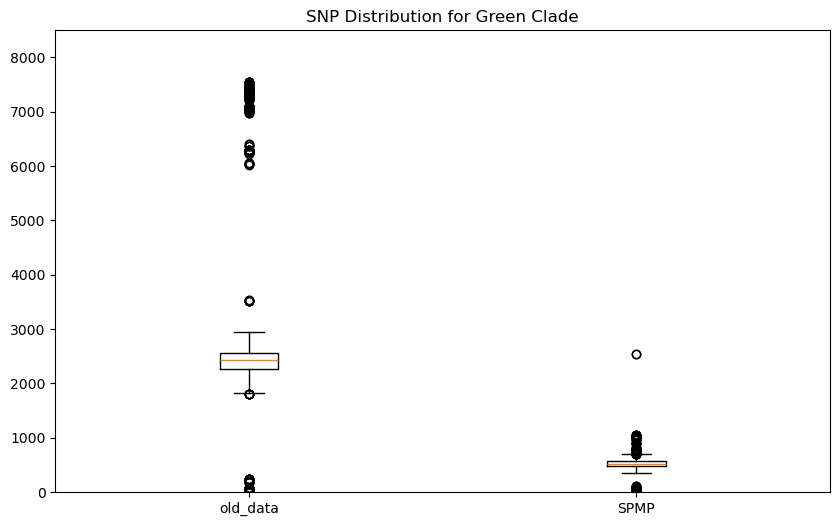

In [230]:
m_diff_g = m_green_merged[m_green_merged['data'] == 'old_data']['diff'].dropna()
m_spmp_diff_g = m_green_merged[m_green_merged['data'] == 'SPMP']['diff_spmp'].dropna()

plot_data_g = [m_diff_g, m_spmp_diff_g]

plt.figure(figsize=(10, 6))
plt.boxplot(plot_data_g, labels=['old_data', 'SPMP'])
plt.title("SNP Distribution for Green Clade")
plt.ylim(0, 8500)
plt.show()

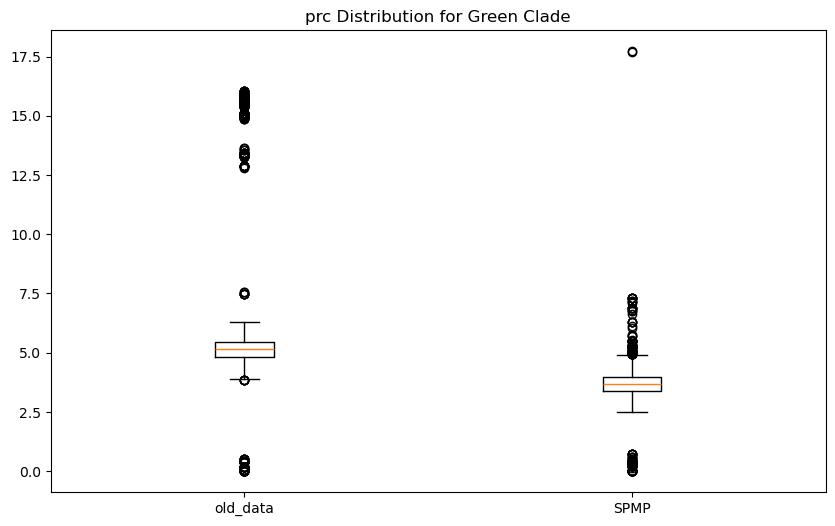

In [231]:
m_prc_g = m_green_merged[m_green_merged['data'] == 'old_data']['prc'].dropna()
m_spmp_prc_g = m_green_merged[m_green_merged['data'] == 'SPMP']['prc_spmp'].dropna()

plot_data_g = [m_prc_g, m_spmp_prc_g]

plt.figure(figsize=(10, 6))
plt.boxplot(plot_data_g, labels=['old_data', 'SPMP'])
plt.title("prc Distribution for Green Clade")
plt.show()

YELLOW/GREEN PAIR COMPARISON

In [232]:
def filter_dataframe_by_clusters(df, cluster1, cluster2):
    p1_values_cluster1 = df[df['cluster'] == cluster1]['p1'].unique()
    p1_values_cluster2 = df[df['cluster'] == cluster2]['p1'].unique()

    p2_values_cluster1 = df[df['cluster'] == cluster1]['p1'].unique()
    p2_values_cluster2 = df[df['cluster'] == cluster2]['p1'].unique()

    filtered_df_1 = df[(df['p1'].isin(p1_values_cluster1)) & (df['p2'].isin(p2_values_cluster2))]
    filtered_df_2 = df[(df['p1'].isin(p1_values_cluster2)) & (df['p2'].isin(p2_values_cluster1))]

    combined_df = pd.concat([filtered_df_1, filtered_df_2]).drop_duplicates()

    return combined_df

m_pairwise_y_g = filter_dataframe_by_clusters(m, 21, 51)
m_pairwise_y_g

,p1,cluster,colour,p2,diff,prc,data
936,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode53.fasta,2050,4.364209,old_data
937,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode87.fasta,2056,4.376983,old_data
952,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode70.fasta,2056,4.376983,old_data
998,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode56.fasta,2050,4.364209,old_data
1004,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode88.fasta,2046,4.355694,old_data
...,...,...,...,...,...,...,...
12744,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode54.fasta,2069,4.404658,old_data
12813,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode96.fasta,1984,4.223703,old_data
12824,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode94.fasta,1907,4.059779,old_data
12839,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode55.fasta,1986,4.227961,old_data


In [233]:
m_pairwise_g_g = filter_dataframe_by_clusters(m, 51, 51)
m_pairwise_g_g

,p1,cluster,colour,p2,diff,prc,data
639,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode50.fasta,0,0.000000,old_data
764,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode80.fasta,17,0.036191,old_data
765,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode82.fasta,84,0.178826,old_data
775,ext_flye.SQK-NBD114-96_barcode49.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode75.fasta,0,0.000000,old_data
901,ext_flye.SQK-NBD114-96_barcode50.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode80.fasta,17,0.036191,old_data
...,...,...,...,...,...,...,...
12701,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode49.fasta,83,0.176697,old_data
12727,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode50.fasta,83,0.176697,old_data
12852,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode80.fasta,74,0.157537,old_data
12853,ext_flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(255.00,127.00,14.00,1.0)",ext_flye.SQK-NBD114-96_barcode82.fasta,1,0.002129,old_data


<Axes: ylabel='diff'>

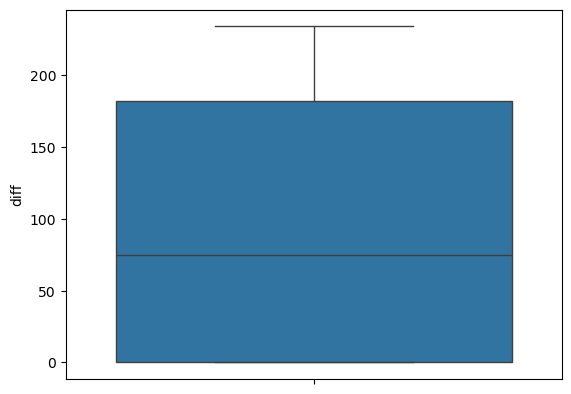

In [234]:
sns.boxplot(m_pairwise_g_g, y='diff')

In [235]:
m_pairwise_y_y = filter_dataframe_by_clusters(m, 21, 21)
m_pairwise_y_y

,p1,cluster,colour,p2,diff,prc,data
960,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode91.fasta,979,2.084176,old_data
1019,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode81.fasta,1048,2.231069,old_data
1051,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode66.fasta,1128,2.401380,old_data
1052,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode84.fasta,1129,2.403508,old_data
1057,ext_flye.SQK-NBD114-96_barcode51.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode86.fasta,983,2.092692,old_data
...,...,...,...,...,...,...,...
14517,ext_flye.SQK-NBD114-96_barcode95.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode55.fasta,189,0.402359,old_data
14525,ext_flye.SQK-NBD114-96_barcode95.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode77.fasta,190,0.404488,old_data
14553,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode94.fasta,331,0.704660,old_data
14568,ext_flye.SQK-NBD114-96_barcode96.fasta,21,"rgba(44.00,160.00,44.00,1.0)",ext_flye.SQK-NBD114-96_barcode55.fasta,158,0.336363,old_data


<Axes: ylabel='diff'>

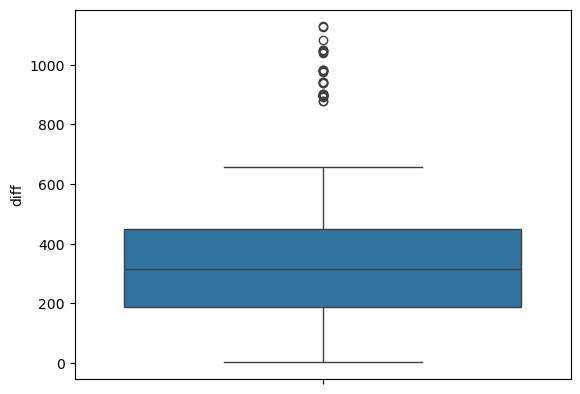

In [236]:
sns.boxplot(m_pairwise_y_y, y='diff')

Text(0.5, 1.0, 'Old data - SNP distribution between yellow and green clades')

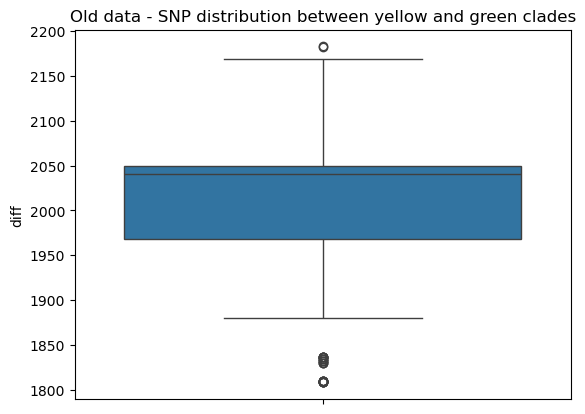

In [237]:
sns.boxplot(m_pairwise_y_g, y='diff')
plt.title('Old data - SNP distribution between yellow and green clades')

In [238]:
def filter_dataframe_by_clusters(df, cluster1, cluster2):
    p1_values_cluster1 = df[df['cluster_spmp'] == cluster1]['p1'].unique()
    p1_values_cluster2 = df[df['cluster_spmp'] == cluster2]['p1'].unique()

    p2_values_cluster1 = df[df['cluster_spmp'] == cluster1]['p1'].unique()
    p2_values_cluster2 = df[df['cluster_spmp'] == cluster2]['p1'].unique()

    filtered_df_1 = df[(df['p1'].isin(p1_values_cluster1)) & (df['p2'].isin(p2_values_cluster2))]
    filtered_df_2 = df[(df['p1'].isin(p1_values_cluster2)) & (df['p2'].isin(p2_values_cluster1))]

    combined_df = pd.concat([filtered_df_1, filtered_df_2]).drop_duplicates()

    return combined_df

m_spmp_pairwise_y_g = filter_dataframe_by_clusters(m_spmp, 154, 51)
m_spmp_pairwise_y_g

,p1,cluster_spmp,colour,p2,diff_spmp,prc_spmp,data
195372,flye.SQK-NBD114-96_barcode52.fasta,154,"rgba(127.00,127.00,127.00,1.0)",flye.SQK-NBD114-96_barcode75.fasta,440,3.073270,SPMP
195375,flye.SQK-NBD114-96_barcode52.fasta,154,"rgba(127.00,127.00,127.00,1.0)",flye.SQK-NBD114-96_barcode88.fasta,475,3.317734,SPMP
195409,flye.SQK-NBD114-96_barcode52.fasta,154,"rgba(127.00,127.00,127.00,1.0)",flye.SQK-NBD114-96_barcode82.fasta,436,3.045331,SPMP
195595,flye.SQK-NBD114-96_barcode52.fasta,154,"rgba(127.00,127.00,127.00,1.0)",flye.SQK-NBD114-96_barcode63.fasta,440,3.073270,SPMP
195646,flye.SQK-NBD114-96_barcode52.fasta,154,"rgba(127.00,127.00,127.00,1.0)",flye.SQK-NBD114-96_barcode79.fasta,440,3.073270,SPMP
...,...,...,...,...,...,...,...
205823,flye.SQK-NBD114-96_barcode88.fasta,51,"rgba(227.00,119.00,194.00,1.0)",flye.SQK-NBD114-96_barcode86.fasta,474,3.310749,SPMP
205835,flye.SQK-NBD114-96_barcode88.fasta,51,"rgba(227.00,119.00,194.00,1.0)",flye.SQK-NBD114-96_barcode64.fasta,475,3.317734,SPMP
205843,flye.SQK-NBD114-96_barcode88.fasta,51,"rgba(227.00,119.00,194.00,1.0)",flye.SQK-NBD114-96_barcode51.fasta,509,3.555214,SPMP
205856,flye.SQK-NBD114-96_barcode89.fasta,51,"rgba(227.00,119.00,194.00,1.0)",flye.SQK-NBD114-96_barcode64.fasta,435,3.038346,SPMP


Text(0.5, 1.0, 'SPMP - SNP distribution between yellow and green clades')

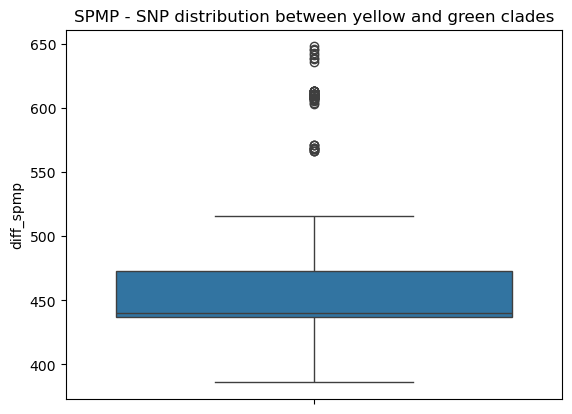

In [239]:
sns.boxplot(m_spmp_pairwise_y_g, y='diff_spmp')
plt.title('SPMP - SNP distribution between yellow and green clades')

CLUSTERING FUNCTIONS

In [240]:
def get_clustered_matrix(distance_matrix, cluster_function, threshold, criterion, kwargs={}):
    
    a = np.array(distance_matrix)
    a = a[np.triu_indices_from(a, k=1)]
    
    try:
        clustering = cluster_function(a, metric=None, ** kwargs)
    except TypeError:
        clustering = cluster_function(a, ** kwargs)

    d = dict(zip(distance_matrix.index, fcluster(clustering, threshold, criterion)))
    order = sorted(d, key=lambda n: d.get(n))
    
    nframe = distance_matrix.copy()
    nframe = nframe[order]
    return nframe.reindex(order), d

def get_clusters_stats(res):
    matrix, clustering = res
    nclusters = len(set(clustering.values()))

    matrix = matrix.melt(ignore_index=False, value_name='distance').reset_index()
    matrix['ss1c'] = matrix['ref'].apply(lambda key: clustering[key])
    matrix['ss2c'] = matrix['query'].apply(lambda key: clustering[key])

    smatrix = matrix[matrix['ref'] != matrix['query']]
    same_smatrix = smatrix[smatrix['ss1c'] == smatrix['ss2c']]
    intra_sim = same_smatrix.groupby('ss1c')['distance'].describe().reset_index()

    notsame_smatrix = smatrix[smatrix['ss1c'] != smatrix['ss2c']]
    inter_sim = notsame_smatrix.groupby(['ss1c', 'ss2c'])['distance'].describe().reset_index()

    return nclusters, intra_sim, inter_sim


COMPUTE DISTANCE MATRICES

In [241]:
skani_dist_matrix = 100 - new_skani_matrix_spmp
parsnp_dist_matrix = 100 - new_parsnp_matrix_spmp

In [242]:
if (skani_dist_matrix < 0).any().any():
    raise ValueError("skANI distance matrix contains negative values")
if (parsnp_dist_matrix < 0).any().any():
    raise ValueError("ParSNP distance matrix contains negative values")

THRESHOLD VS # CLUSTERS

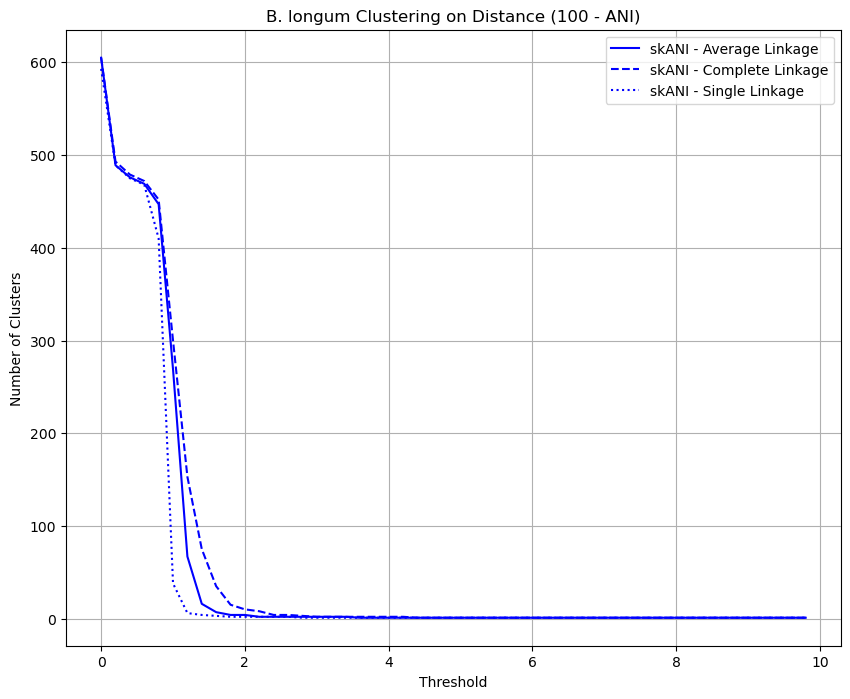

In [243]:
threshold_values = [i / 10 for i in range(0, 100, 2)]

mummer_results_avg, skani_results_avg = {}, {}
mummer_results_compl, skani_results_compl = {}, {}
mummer_results_single, skani_results_single = {}, {}

for threshold in threshold_values:
    # average
    skani_res_a = get_clustered_matrix(skani_dist_matrix, average, threshold, 'distance')

    skani_clusters_a = skani_res_a[1]

    num_skani_clusters_a = len(set(skani_clusters_a.values()))

    skani_results_avg[threshold] = num_skani_clusters_a

    # complete
    skani_res_c = get_clustered_matrix(skani_dist_matrix, complete, threshold, 'distance')

    skani_clusters_c = skani_res_c[1]

    num_skani_clusters_c = len(set(skani_clusters_c.values()))

    skani_results_compl[threshold] = num_skani_clusters_c

    # single
    skani_res_s = get_clustered_matrix(skani_dist_matrix, single, threshold, 'distance')

    skani_clusters_s = skani_res_s[1]

    num_skani_clusters_s = len(set(skani_clusters_s.values()))

    skani_results_single[threshold] = num_skani_clusters_s

plt.figure(figsize=(10, 8))

plt.plot(list(skani_results_avg.keys()), list(skani_results_avg.values()), 'b-', label='skANI - Average Linkage')

plt.plot(list(skani_results_compl.keys()), list(skani_results_compl.values()), 'b--', label='skANI - Complete Linkage')

plt.plot(list(skani_results_single.keys()), list(skani_results_single.values()), 'b:', label='skANI - Single Linkage')

plt.title('B. longum Clustering on Distance (100 - ANI)')
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.legend(loc='best')
plt.show()

ZOOM IN ON REGION OF STABILITY

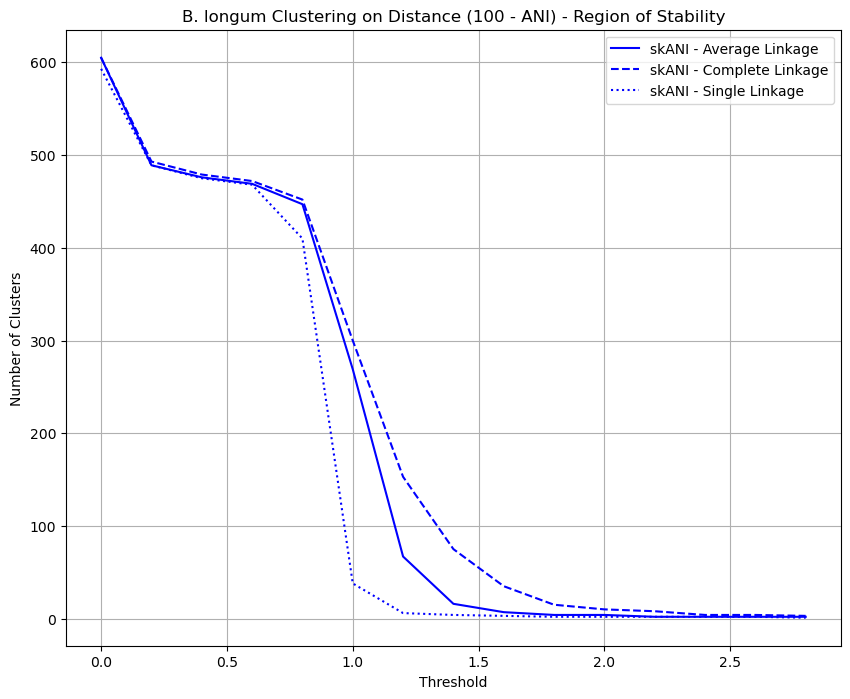

In [244]:
threshold_values = [i / 10 for i in range(0, 30, 2)]

mummer_results_avg, skani_results_avg = {}, {}
mummer_results_compl, skani_results_compl = {}, {}
mummer_results_single, skani_results_single = {}, {}

for threshold in threshold_values:
    # average
    skani_res_a = get_clustered_matrix(skani_dist_matrix, average, threshold, 'distance')

    skani_clusters_a = skani_res_a[1]

    num_skani_clusters_a = len(set(skani_clusters_a.values()))

    skani_results_avg[threshold] = num_skani_clusters_a

    # complete
    skani_res_c = get_clustered_matrix(skani_dist_matrix, complete, threshold, 'distance')

    skani_clusters_c = skani_res_c[1]

    num_skani_clusters_c = len(set(skani_clusters_c.values()))

    skani_results_compl[threshold] = num_skani_clusters_c

    # single
    skani_res_s = get_clustered_matrix(skani_dist_matrix, single, threshold, 'distance')

    skani_clusters_s = skani_res_s[1]

    num_skani_clusters_s = len(set(skani_clusters_s.values()))

    skani_results_single[threshold] = num_skani_clusters_s

plt.figure(figsize=(10, 8))

plt.plot(list(skani_results_avg.keys()), list(skani_results_avg.values()), 'b-', label='skANI - Average Linkage')

plt.plot(list(skani_results_compl.keys()), list(skani_results_compl.values()), 'b--', label='skANI - Complete Linkage')

plt.plot(list(skani_results_single.keys()), list(skani_results_single.values()), 'b:', label='skANI - Single Linkage')

plt.title('B. longum Clustering on Distance (100 - ANI) - Region of Stability')
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [245]:
x_value = 3

def get_y_for_x(x_value, results_dict):
    x_points = list(results_dict.keys())
    y_points = list(results_dict.values())
    
    y_interpolated = np.interp(x_value, x_points, y_points)
    return y_interpolated

y_skani_avg = get_y_for_x(x_value, skani_results_avg)
y_skani_compl = get_y_for_x(x_value, skani_results_compl)
y_skani_single = get_y_for_x(x_value, skani_results_single)

print(f"Y values for x = {x_value}:")
print(f"skANI - Average Linkage: {y_skani_avg}")
print(f"skANI - Complete Linkage: {y_skani_compl}")
print(f"skANI - Single Linkage: {y_skani_single}")

Y values for x = 3:
skANI - Average Linkage: 2.0
skANI - Complete Linkage: 3.0
skANI - Single Linkage: 1.0


In [246]:
def get_clusters_for_linkage(distance_matrix, linkage_function, threshold, tool_name, linkage_name):
    res = get_clustered_matrix(distance_matrix, linkage_function, threshold, 'distance')

    clusters = res[1]

    clusters_samples_dict = defaultdict(list)
    for sample, cluster_id in clusters.items():
        clusters_samples_dict[cluster_id].append(sample)

    # print(f"\nClusters for {tool_name} with {linkage_name} linkage at threshold {threshold}:")
    for cluster_id, samples in clusters_samples_dict.items():
        # print(f"Cluster {cluster_id}:")
        # for sample in samples:
        #     print(f"  {sample}")
        samples_array = np.array(samples)
        # print(f"Cluster {cluster_id}: {samples_array}")
    return clusters_samples_dict

tools = [
    (skani_dist_matrix, 'skANI', [average, 'Average Linkage'], [complete, 'Complete Linkage'], [single, 'Single Linkage'])
]

for distance_matrix, tool_name, *linkages in tools:
    for linkage_function, linkage_name in linkages:
        get_clusters_for_linkage(distance_matrix, linkage_function, x_value, tool_name, linkage_name)

COMPARING TOOLS

In [247]:
mummer_matrix_2 = mummer_matrix.copy()
mummer_matrix_2.rename(columns = {'avg_identity1':'ANI_1', 'avg_identity2':'ANI_2'}, inplace = True)
mummer_matrix_2

NameError: name 'mummer_matrix' is not defined

In [ ]:
skani_matrix_2 = skani_matrix_spmp.copy()
skani_matrix_2.rename(columns = {'Ref_file': 's1', 'Query_file': 's2', 'ANI':'ANI_1', 'Align_fraction_ref': 'prc_aligned1', 'Align_fraction_query': 'prc_aligned2'}, inplace = True)
skani_matrix_2

In [ ]:
parsnp_matrix_2 = parsnp_matrix_spmp.copy()
parsnp_matrix_2.rename(columns = {'p1': 's1', 'p2': 's2'}, inplace = True)
parsnp_matrix_2

In [ ]:
all_tools_df = pd.concat([mummer_matrix_2, skani_matrix_2, parsnp_matrix_2], ignore_index=True)
all_tools_df.rename(columns={'score1': 'aligned_bases'}, inplace=True)
all_tools_df

In [ ]:
melted_df = pd.melt(all_tools_df, id_vars=['Tool'], value_vars=['ANI_1', 'aligned_bases'], var_name='Type', value_name='ANI')
melted_df

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=melted_df, x='Tool', y='ANI', hue='Type')
plt.title('Distance Distribution by Tool')
plt.show()

In [ ]:
filtered_melted_df = melted_df[melted_df['Type'] == 'ANI_1']
filtered_melted_df

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_melted_df, x='Tool', y='ANI')
plt.title('B. longum ANI Distribution by Tool')
plt.show()

In [ ]:
regplot_df = pd.DataFrame({'mummer_ref': mummer_matrix['s1'],
                           'skani_ref': skani_matrix_spmp['Ref_file'],
                           'parsnp_ref': parsnp_matrix_spmp['p1'],
                           'mummer_query': mummer_matrix['s2'],
                           'skani_query': skani_matrix_spmp['Query_file'],
                           'parsnp_query': parsnp_matrix_spmp['p2'],
                           'mummer_ANI': mummer_matrix['avg_identity1'],
                           'skani_ANI': skani_matrix_spmp['ANI'],
                           'parsnp_ANI': parsnp_matrix_spmp['ANI_1']})
regplot_df

In [ ]:
sns.scatterplot(data=regplot_df, x='mummer_ANI', y='skani_ANI')
plt.plot([95, 100], [95, 100])
plt.title("Mummer Identity vs skANI ANI")
plt.show()

In [ ]:
sns.scatterplot(data=regplot_df, x='mummer_ANI', y='parsnp_ANI')
plt.plot([95, 100], [95, 100])
plt.title("Mummer Identity vs ParSNP ANI")
plt.show()

In [ ]:
sns.scatterplot(data=regplot_df, x='skani_ANI', y='parsnp_ANI')
plt.plot([95, 100], [95, 100])
plt.title("skANI ANI vs ParSNP ANI")
plt.show()